# Book Recommendation System - Part 1

---

## Overview

In today's digital world, online stores and content providers can offer thousands of products and content to their customers easily. To help consumers search through the myriad of items available, companies use recommendation systems to predict and generate what kind of products/content consumers might like.

For instance, Amazon is one of the pioneers and well-known companies that uses recommendation systems. They can create personalised product recommendations for each customer, and these recommendations accounted for 35% of Amazon's revenue [[source]](https://www.mckinsey.com/industries/retail/our-insights/how-retailers-can-keep-up-with-consumers). 

![1](images/amazon_3.jpg "amazon_3")

---
In order for these recommendation systems to work, they would require information such as user browsing history, purchase history or product information.

**Therefore, recommendations of similar users can be shared.**

![2](images/amazon_2.jpg "amazon_2")

**Recommendations can also be based on the user's viewing history.**

![3](images/amazon.jpg "amazon_2")

---

## Problem Statement

**How can we implement a recommendation system to predict books that a user would like?**

We will be using the [goodbook 10k extended dataset](https://github.com/malcolmosh/goodbooks-10k-extended) to address this problem. The data originated from [Goodreads](https://www.goodreads.com/), the world's largest website for readers to find and share books that they like. It was originally scrapped by [zygmuntz](https://github.com/zygmuntz/goodbooks-10k) in 2017, and updated by [malcolmosh](https://github.com/malcolmosh/goodbooks-10k-extended) in 2021.

![3](images/gr_similar.jpg "goodreads")

---
## Contents:

- [Imports](#Imports)
- [Data Dictionary](#Data-Dictionary)
- [Data Cleaning](#Data-Cleaning)   
- [Exploratory Data Analysis and Data Preprocessing](#Exploratory-Data-Analysis-and-Data-Preprocessing)
     - [Books](#Books)
         - [Correlation heatmap and scatter plot](#Correlation-heatmap-and-scatter-plot)
         - [Highest rated books](#Highest-rated-books)
         - [Most popular books](#Most-popular-books)
         - [Average rating given](#Average-rating-given)
         - [Top books for each rating score](#Top-books-for-each-rating-score)
         - [Highest weighted rating books](#Highest-weighted-rating-books)
         - [Original publication year](#Original-publication-year)
         - [List of Authors](#List-of-Authors)
         - [List of Book Genres](#List-of-Book-Genres)
         - [Number of Pages](#Number-of-Pages)
         - [Cleaning Book Description](#Cleaning-Book-Description)
     - [Ratings](#Ratings)
         - [Number of ratings per user](#Number-of-ratings-per-user)
         - [Average rating per user](#Average-rating-per-user)
         - [Number of ratings per book](#Number-of-ratings-per-book)
         - [Reduce dataset dimensionality](#Reduce-dataset-dimensionality)
         - [Long Tail Plot](#Long-Tail-Plot)
         - [Sparsity](#Sparsity)
---

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import recmetrics

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler

In [2]:
books = pd.read_csv('./dataset/books_enriched.csv')
ratings = pd.read_csv('./dataset/ratings.csv')

In [3]:
# To display all columns
pd.set_option('display.max_columns', None)


---


## Data Dictionary

| No. | Column                    | Dataset            | Type    | Description                                                                                                  |
|-----|---------------------------|--------------------|---------|--------------------------------------------------------------------------------------------------------------|
| 1   | authors                   | books_enriched.csv | object  | names of all book contributors, including illustrators and collaborators                                     |
| 2   | average_rating            | books_enriched.csv | float64 | average rating                                                                                               |
| 3   | best_book_id              | books_enriched.csv | int64   | book id of its most popular edition from Goodreads. e.g. https://www.goodreads.com/book/show/2767052         |
| 4   | book_id                   | books_enriched.csv | int64   | unique ID for each book                                                                                      |
| 5   | books_count               | books_enriched.csv | int64   | number of editions                                                                                           |
| 6   | description               | books_enriched.csv | object  | free text summarizing book's content                                                                         |
| 7   | genres                    | books_enriched.csv | object  | genre tags taken from top shelves users assigned to a book                                                   |
| 8   | goodreads_book_id         | books_enriched.csv | int64   | book id with reference to Goodreads website                                                                          |
| 9   | image_url                 | books_enriched.csv | object  | url link to book cover image                                                                                 |
| 10  | isbn                      | books_enriched.csv | object  | 9-digit Standard Book Numbering (SBN) or 10-digit International Standard Book Number (ISBN)                  |
| 11  | isbn13                    | books_enriched.csv | float64 | 13-digit ISBN, assigned after 1 Jan 2007                                                                     |
| 12  | language_code             | books_enriched.csv | object  | abbreviated language tags for all books                                                                      |
| 13  | original_publication_year | books_enriched.csv | float64 | year when the book was first published                                                                       |
| 14  | original_title            | books_enriched.csv | object  | original title when book first published                                                                     |
| 15  | pages                     | books_enriched.csv | float64 | total page count                                                                                             |
| 16  | publishDate               | books_enriched.csv | object  | publication date                                                                                             |
| 117 | ratings_1                 | books_enriched.csv | int64   | number of ratings with 1                                                                                     |
| 18  | ratings_2                 | books_enriched.csv | int64   | number of ratings with 2                                                                                     |
| 19  | ratings_3                 | books_enriched.csv | int64   | number of ratings with 3                                                                                     |
| 20  | ratings_4                 | books_enriched.csv | int64   | number of ratings with 4                                                                                     |
| 21  | ratings_5                 | books_enriched.csv | int64   | number of ratings with 5                                                                                     |
| 22  | ratings_count             | books_enriched.csv | int64   | total number of ratings received                                                                             |
| 23  | small_image_url           | books_enriched.csv | object  | url link to smaller book cover image                                                                         |
| 24  | title                     | books_enriched.csv | object  | book title                                                                                                   |
| 25  | work_id                   | books_enriched.csv | int64   | book id to reflect the list of editions of given title. e.g. https://www.goodreads.com/work/editions/2792775 |
| 26  | work_ratings_count        | books_enriched.csv | int64   | total number of ratings received                                                                             |
| 27  | work_text_reviews_count   | books_enriched.csv | int64   | number of written reviews received                                                                           |
| 28  | authors_2                 | books_enriched.csv | object  | all book contributors, including illustrators and collaborators                                              |
| 29  | user_id                   | ratings.csv        | int64   | user id                                                                                                      |
| 30  | book_id                   | ratings.csv        | int64   | book id                                                                                                      |
| 31  | rating                    | ratings.csv        | int64   | rating for given book                                                                                        |

---

## Data Cleaning

### Books

In [4]:
books.head()

,Unnamed: 0,index,authors,average_rating,best_book_id,book_id,books_count,description,genres,goodreads_book_id,image_url,isbn,isbn13,language_code,original_publication_year,original_title,pages,publishDate,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,ratings_count,small_image_url,title,work_id,work_ratings_count,work_text_reviews_count,authors_2
0,0,0,['Suzanne Collins'],4.34,2767052,1,272,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['young-adult', 'fiction', 'fantasy', 'science...",2767052,https://images.gr-assets.com/books/1447303603m...,439023483,9.780439e+12,eng,2008.0,The Hunger Games,374.0,09/14/08,66715,127936,560092,1481305,2706317,4780653,https://images.gr-assets.com/books/1447303603s...,"The Hunger Games (The Hunger Games, #1)",2792775,4942365,155254,['Suzanne Collins']
1,1,1,"['J.K. Rowling', 'Mary GrandPré']",4.44,3,2,491,Harry Potter's life is miserable. His parents ...,"['fantasy', 'fiction', 'young-adult', 'classics']",3,https://images.gr-assets.com/books/1474154022m...,439554934,9.780440e+12,eng,1997.0,Harry Potter and the Philosopher's Stone,309.0,11/01/03,75504,101676,455024,1156318,3011543,4602479,https://images.gr-assets.com/books/1474154022s...,Harry Potter and the Sorcerer's Stone (Harry P...,4640799,4800065,75867,"['J.K. Rowling', 'Mary GrandPré']"
2,2,2,['Stephenie Meyer'],3.57,41865,3,226,About three things I was absolutely positive.\...,"['young-adult', 'fantasy', 'romance', 'fiction...",41865,https://images.gr-assets.com/books/1361039443m...,316015849,9.780316e+12,eng,2005.0,Twilight,501.0,09/06/06,456191,436802,793319,875073,1355439,3866839,https://images.gr-assets.com/books/1361039443s...,"Twilight (Twilight, #1)",3212258,3916824,95009,['Stephenie Meyer']
3,3,3,['Harper Lee'],4.25,2657,4,487,The unforgettable novel of a childhood in a sl...,"['classics', 'fiction', 'historical-fiction', ...",2657,https://images.gr-assets.com/books/1361975680m...,61120081,9.780061e+12,eng,1960.0,To Kill a Mockingbird,324.0,05/23/06,60427,117415,446835,1001952,1714267,3198671,https://images.gr-assets.com/books/1361975680s...,To Kill a Mockingbird,3275794,3340896,72586,['Harper Lee']
4,4,4,['F. Scott Fitzgerald'],3.89,4671,5,1356,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"['classics', 'fiction', 'historical-fiction', ...",4671,https://images.gr-assets.com/books/1490528560m...,743273567,9.780743e+12,eng,1925.0,The Great Gatsby,200.0,09/28/04,86236,197621,606158,936012,947718,2683664,https://images.gr-assets.com/books/1490528560s...,The Great Gatsby,245494,2773745,51992,['F. Scott Fitzgerald']


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 10000 non-null  int64  
 1   index                      10000 non-null  int64  
 2   authors                    10000 non-null  object 
 3   average_rating             10000 non-null  float64
 4   best_book_id               10000 non-null  int64  
 5   book_id                    10000 non-null  int64  
 6   books_count                10000 non-null  int64  
 7   description                9943 non-null   object 
 8   genres                     10000 non-null  object 
 9   goodreads_book_id          10000 non-null  int64  
 10  image_url                  10000 non-null  object 
 11  isbn                       9300 non-null   object 
 12  isbn13                     9415 non-null   float64
 13  language_code              10000 non-null  obje

In [6]:
books.describe()

,Unnamed: 0,index,average_rating,best_book_id,book_id,books_count,goodreads_book_id,isbn13,original_publication_year,pages,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,ratings_count,work_id,work_ratings_count,work_text_reviews_count
count,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.00000,10000.000000,1.000000e+04,9.415000e+03,9979.000000,9927.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000
mean,4999.50000,4526.324400,4.002191,5.471214e+06,5000.50000,75.712700,5.264697e+06,9.755044e+12,1981.987674,359.419764,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04,5.400124e+04,8.646183e+06,5.968732e+04,2919.955300
std,2886.89568,2567.923711,0.254427,7.827330e+06,2886.89568,170.470728,7.575462e+06,4.428619e+11,152.576665,216.949919,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04,1.573700e+05,1.175106e+07,1.678038e+05,6124.378132
min,0.00000,0.000000,2.470000,1.000000e+00,1.00000,1.000000,1.000000e+00,1.951703e+08,-1750.000000,0.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02,2.716000e+03,8.700000e+01,5.510000e+03,3.000000
25%,2499.75000,2351.750000,3.850000,4.791175e+04,2500.75000,23.000000,4.627575e+04,9.780316e+12,1990.000000,250.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03,1.356875e+04,1.008841e+06,1.543875e+04,694.000000
50%,4999.50000,4567.500000,4.020000,4.251235e+05,5000.50000,40.000000,3.949655e+05,9.780452e+12,2004.000000,336.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03,2.115550e+04,2.719524e+06,2.383250e+04,1402.000000
75%,7499.25000,6661.250000,4.180000,9.636112e+06,7500.25000,67.000000,9.382225e+06,9.780831e+12,2011.000000,424.000000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04,4.105350e+04,1.451775e+07,4.591500e+04,2744.250000
max,9999.00000,9999.000000,4.820000,3.553423e+07,10000.00000,3455.000000,3.328864e+07,9.790008e+12,2017.000000,5216.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06,4.780653e+06,5.639960e+07,4.942365e+06,155254.000000


#### Missing data

In [7]:
# Checking for null values
books.isnull().sum()

Unnamed: 0                     0
index                          0
authors                        0
average_rating                 0
best_book_id                   0
book_id                        0
books_count                    0
description                   57
genres                         0
goodreads_book_id              0
image_url                      0
isbn                         700
isbn13                       585
language_code                  0
original_publication_year     21
original_title               585
pages                         73
publishDate                    8
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
ratings_count                  0
small_image_url                0
title                          0
work_id                        0
work_ratings_count             0
work_text_reviews_count        0
authors_2                      0
dtype: int

We will review the rows with missing data:

#### Book description

In [8]:
books[books['description'].isnull()].head()

,Unnamed: 0,index,authors,average_rating,best_book_id,book_id,books_count,description,genres,goodreads_book_id,image_url,isbn,isbn13,language_code,original_publication_year,original_title,pages,publishDate,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,ratings_count,small_image_url,title,work_id,work_ratings_count,work_text_reviews_count,authors_2
427,427,427,['Anonymous'],4.43,1923820,464,1449,NaN,"['religion', 'classics', 'nonfiction', 'christ...",1923820,https://images.gr-assets.com/books/1313518530m...,NaN,NaN,eng,1611.0,NaN,1590.0,01/15/08,10011,6802,11712,14338,128731,159457,https://images.gr-assets.com/books/1313518530s...,Holy Bible: King James Version,6405906,171594,4438,['Anonymous']
911,911,911,['Jules Verne'],3.84,32829,972,1363,NaN,"['classics', 'science-fiction', 'fiction', 'fa...",32829,https://s.gr-assets.com/assets/nophoto/book/11...,553213970,9.780553e+12,eng,1864.0,Voyage au centre de la Terre,240.0,April 25th 2006,1238,6342,31442,42106,29972,89410,https://s.gr-assets.com/assets/nophoto/book/50...,Journey to the Center of the Earth (Extraordin...,1924715,111100,3483,['Jules Verne']
1044,1044,1044,"['Aesop', 'Laura Harris', 'Laura Gibbs']",4.05,21348,1120,942,NaN,"['classics', 'fiction', 'fantasy', 'philosophy']",21348,https://s.gr-assets.com/assets/nophoto/book/11...,192840509,9.780193e+12,eng,-560.0,Aesopica,306.0,April 10th 2003,773,3717,22587,34885,37000,88508,https://s.gr-assets.com/assets/nophoto/book/50...,Aesop's Fables,868263,98962,1441,"['Aesop', 'Laura Harris', 'Laura Gibbs']"
1244,1244,1244,"['Allen Ginsberg', 'William Carlos Williams']",4.14,6295,1329,47,NaN,"['poetry', 'classics', 'fiction']",6295,https://images.gr-assets.com/books/1327870926m...,872863107,9.780873e+12,eng,1956.0,Howl and Other Poems,56.0,01/01/01,1544,3203,12223,24316,34043,71968,https://images.gr-assets.com/books/1327870926s...,Howl and Other Poems,2290688,75329,1255,"['Allen Ginsberg', 'William Carlos Williams']"
1252,1252,1252,"['Anonymous', 'Joseph Smith Jr.']",4.37,323355,1338,343,NaN,"['religion', 'nonfiction', 'spirituality', 'hi...",323355,https://images.gr-assets.com/books/1327389004m...,967686563,9.780968e+12,eng,1830.0,The Book of Mormon,531.0,10/28/13,6989,2468,2246,1749,52708,63530,https://images.gr-assets.com/books/1327389004s...,The Book of Mormon: Another Testament of Jesus...,2139868,66160,5349,"['Anonymous', 'Joseph Smith Jr.']"


In [9]:
books['description'].head()

0    WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1    Harry Potter's life is miserable. His parents ...
2    About three things I was absolutely positive.\...
3    The unforgettable novel of a childhood in a sl...
4    Alternate Cover Edition ISBN: 0743273567 (ISBN...
Name: description, dtype: object

Most of the data from rows with missing `description` are intact. We can replace with a blank string and retain the row.

In [10]:
# Replace `description` with blank strings
books['description'].fillna("", axis=0, inplace=True)

#### Original_publication_year and publishDate

In [11]:
books[books['original_publication_year'].isnull()]

,Unnamed: 0,index,authors,average_rating,best_book_id,book_id,books_count,description,genres,goodreads_book_id,image_url,isbn,isbn13,language_code,original_publication_year,original_title,pages,publishDate,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,ratings_count,small_image_url,title,work_id,work_ratings_count,work_text_reviews_count,authors_2
198,198,198,['Mark Cotta Vaz'],4.23,3609760,220,20,Everything fans want to know about the hotly a...,"['young-adult', 'fantasy', 'paranormal', 'roma...",3609760,https://images.gr-assets.com/books/1352539022m...,316043133,9.780316e+12,eng,NaN,Twilight: The Complete Illustrated Movie Compa...,144.0,October 28th 2008,6862,11019,48008,67939,158071,291411,https://images.gr-assets.com/books/1352539022s...,Twilight: The Complete Illustrated Movie Compa...,3652511,291899,532,['Mark Cotta Vaz']
3249,3249,3249,['Yuu Watase'],4.01,856917,3506,9,Shy high school student Riko Izawa aches for a...,"['manga', 'romance', 'graphic-novels', 'young-...",856917,https://s.gr-assets.com/assets/nophoto/book/11...,1421500167,9.781422e+12,eng,NaN,絶対彼氏 (Zettai Kareshi) 1,191.0,February 7th 2006,1197,2156,5661,6559,13977,29385,https://s.gr-assets.com/assets/nophoto/book/50...,"Absolute Boyfriend, Vol. 1",3874446,29550,400,['Yuu Watase']
3881,3881,3881,"['P.C. Cast', 'Kristin Cast']",4.43,8724779,4248,1,"The House of Night is a thrilling, New York Ti...","['fantasy', 'young-adult', 'paranormal', 'roma...",8724779,https://images.gr-assets.com/books/1347018756m...,312530641,9.780313e+12,eng,NaN,NaN,NaN,September 29th 2009,471,648,2118,3645,13696,20578,https://images.gr-assets.com/books/1347018756s...,Marked / Betrayed / Chosen / Untamed / Hunted ...,13597737,20578,77,"['P.C. Cast', 'Kristin Cast']"
4252,4252,4252,['BookRags'],4.59,9832370,4708,1,This study guide includes the following sectio...,"['fantasy', 'fiction']",9832370,https://images.gr-assets.com/books/1369340463m...,NaN,NaN,eng,NaN,NaN,144.0,November 10th 2010,278,151,877,4460,13194,18960,https://images.gr-assets.com/books/1369340463s...,BookRags Summary: A Storm of Swords,27881851,18960,92,['BookRags']
4303,4303,4303,['James Rollins'],4.16,5171894,4771,50,"James Rollins, the ""New York Times"" bestsellin...","['thriller', 'fiction', 'mystery', 'suspense',...",5171894,https://images.gr-assets.com/books/1340970015m...,61231401,9.780061e+12,eng,NaN,NaN,448.0,June 23rd 2009,169,555,3623,8819,8665,19510,https://images.gr-assets.com/books/1340970015s...,"The Doomsday Key (Sigma Force, #6)",5238959,21831,864,['James Rollins']
4392,4392,4392,['Bella Forrest'],4.01,17733861,4878,11,Having been delighted by the bestselling debut...,"['paranormal', 'romance', 'young-adult', 'fant...",17733861,https://images.gr-assets.com/books/1365199807m...,NaN,NaN,eng,NaN,NaN,340.0,April 8th 2013,437,1315,5250,8685,9424,24757,https://images.gr-assets.com/books/1365199807s...,"A Shade of Blood (A Shade of Vampire, #2)",24809815,25111,1302,['Bella Forrest']
5001,5001,5001,['Stephen R. Covey'],3.99,1044141,5610,68,The 8th Habit: From Effectiveness to Greatness,"['self-help', 'business', 'nonfiction', 'psych...",1044141,https://s.gr-assets.com/assets/nophoto/book/11...,743287932,9.780743e+12,eng,NaN,NaN,432.0,November 9th 2004,319,789,2989,4904,5395,13765,https://s.gr-assets.com/assets/nophoto/book/50...,The 8th Habit: From Effectiveness to Greatness,1673783,14396,330,['Stephen R. Covey']
5208,5208,5208,['Charles Dickens'],3.98,9748274,5872,33,Two of the most beloved novels in all of Engli...,"['classics', 'fiction', 'historical-fiction']",9748274,https://s.gr-assets.com/assets/nophoto/book/11...,142196584,9.780142e+12,eng,NaN,NaN,834.0,December 6th 2010,445,904,2935,5051,5737,14912,https://s.gr-assets.com/assets/nophoto/book/50...,A Tale of Two Cities / Great Expectations,14637456,15072,179,['Charles Dickens']
5648,5648,5648,['Carolyn Keene'],4.19,48811,6429,4,"Nancy Drew has been solving mysteries, and del...","['mystery', 'young-adult', 'classics', 'fictio...",48811,https://s.

In [12]:
books[books['publishDate'].isnull()]

,Unnamed: 0,index,authors,average_rating,best_book_id,book_id,books_count,description,genres,goodreads_book_id,image_url,isbn,isbn13,language_code,original_publication_year,original_title,pages,publishDate,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,ratings_count,small_image_url,title,work_id,work_ratings_count,work_text_reviews_count,authors_2
2752,2752,2752,['C.S. Lewis'],4.14,121732,2957,77,Surprised by Joy: The Shape of My Early Life i...,"['biography', 'christian', 'nonfiction', 'reli...",121732,https://images.gr-assets.com/books/1381407473m...,6280838,9.780006e+12,eng,1955.0,Surprised by Joy: The Shape of My Early Life,185.0,NaN,612,1261,6142,12367,15604,33698,https://images.gr-assets.com/books/1381407473s...,Surprised by Joy: The Shape of My Early Life,877675,35986,1156,['C.S. Lewis']
3314,3314,3314,['Louisa May Alcott'],3.84,78950,3580,475,"With two sons of her own, and twelve rescued o...","['classics', 'fiction', 'young-adult', 'histor...",78950,https://s.gr-assets.com/assets/nophoto/book/11...,1406954365,9.781407e+12,eng,1871.0,"Little Men, or Life at Plumfield with Jo's Boys",329.0,NaN,530,2599,11590,14805,11788,36501,https://s.gr-assets.com/assets/nophoto/book/50...,"Little Men (Little Women, #2)",2180439,41312,1241,['Louisa May Alcott']
3542,3542,3542,['Rachel Renée Russell'],4.31,9635657,3848,51,It’s Diary of a Wimpy Kid for girls in this hi...,"['fiction', 'graphic-novels', 'young-adult', '...",9635657,https://images.gr-assets.com/books/1370064614m...,NaN,NaN,eng,2011.0,Tales From a Not-So-Talented Pop Star,320.0,NaN,532,954,3388,5579,14550,22337,https://images.gr-assets.com/books/1370064614s...,Tales from a Not-So-Talented Pop Star (Dork Di...,14523019,25003,866,['Rachel Renée Russell']
4381,4381,4381,['Fyodor Dostoyevsky'],4.05,1772910,4866,267,"White Nights, is a short story by Fyodor Dosto...","['classics', 'fiction', 'romance']",1772910,https://images.gr-assets.com/books/1450699039m...,NaN,NaN,eng,1848.0,Белые ночи,82.0,NaN,195,1016,4708,8823,8543,13405,https://images.gr-assets.com/books/1450699039s...,White Nights,4111509,23285,1427,['Fyodor Dostoyevsky']
5101,5101,5101,['Danielle Steel'],4.04,59889,5740,58,"On a wind-swept summer day in San Francisco, a...","['romance', 'fiction', 'chick-lit', 'contempor...",59889,https://s.gr-assets.com/assets/nophoto/book/11...,739437585,9.780739e+12,eng,2003.0,Safe Harbour,338.0,NaN,333,703,3650,5311,6732,16205,https://s.gr-assets.com/assets/nophoto/book/50...,Safe Harbour,58250,16729,224,['Danielle Steel']
6138,6138,6138,['Tara Sivec'],4.28,23016364,7085,14,Librarian's Note: this is an alternate cover e...,"['romance', 'contemporary', 'chick-lit', 'fict...",15769463,https://images.gr-assets.com/books/1344367548m...,1478314605,9.781478e+12,eng,2012.0,Futures and Frosting,321.0,NaN,255,616,2964,7587,11411,16341,https://images.gr-assets.com/books/1344367548s...,"Futures and Frosting (Chocolate Lovers, #2)",21476322,22833,1815,['Tara Sivec']
8099,8099,8099,['Chuck Palahniuk'],3.93,6395833,9900,2,,"['fiction', 'horror', 'contemporary', 'thriller']",6395833,https://images.gr-assets.com/books/1273235556m...,NaN,NaN,eng,2004.0,Guts,16.0,NaN,384,701,2047,3302,3898,10300,https://images.gr-assets.com/books/1273235556s...,Guts,6584446,10332,492,['Chuck Palahniuk']
8138,8138,8138,['Terry Ryan'],3.90,127970,9960,26,"Evelyn Ryan, wife of an alcoholic husband and ...","['nonfiction', 'memoir', 'biography', 'history']",127970,https://s.gr-assets.com/assets/nophoto/book/11...,739416383,9.780739e+12,eng,2001.0,"The Prize Winner of Defiance, Ohio: How My Mot...",496.0,NaN,118,498,2739,4816,2980,9380,https://s.gr-assets.com/assets/nophoto/book/50...,"The Prize Winner of Defiance, Ohio: How My Mot...",1066433,11151,1849,['Terry Ryan']


For rows with missing `original_publication_year`, they have its corresponding `publishDate` data to refer on. We can impute the missing years using `publishDate`.

For rows with missing `publishDate`, additional research/web-scrapping is required to obtain the data. Furthermore, the corresponding `original_publication_year` is already available. Hence, we will drop this column for our analysis.

In [13]:
books.at[198, 'original_publication_year'] = 2008
books.at[3249, 'original_publication_year'] = 2006
books.at[3881, 'original_publication_year'] = 2009
books.at[4252, 'original_publication_year'] = 2010
books.at[4303, 'original_publication_year'] = 2009
books.at[4392, 'original_publication_year'] = 2013
books.at[5001, 'original_publication_year'] = 2004
books.at[5208, 'original_publication_year'] = 2010
books.at[5648, 'original_publication_year'] = 2006
books.at[7163, 'original_publication_year'] = 2004
books.at[7850, 'original_publication_year'] = 2007
books.at[8119, 'original_publication_year'] = 2009
books.at[8227, 'original_publication_year'] = 1998
books.at[8532, 'original_publication_year'] = 2003
books.at[8568, 'original_publication_year'] = 2003
books.at[9140, 'original_publication_year'] = 2010
books.at[9151, 'original_publication_year'] = 2016
books.at[9198, 'original_publication_year'] = 2001
books.at[9254, 'original_publication_year'] = 2000
books.at[9728, 'original_publication_year'] = 2012
books.at[9842, 'original_publication_year'] = 2009

In [14]:
books[books['original_publication_year'].isnull()]

,Unnamed: 0,index,authors,average_rating,best_book_id,book_id,books_count,description,genres,goodreads_book_id,image_url,isbn,isbn13,language_code,original_publication_year,original_title,pages,publishDate,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,ratings_count,small_image_url,title,work_id,work_ratings_count,work_text_reviews_count,authors_2


#### Pages

In [15]:
books[books['pages'].isnull()].head()

,Unnamed: 0,index,authors,average_rating,best_book_id,book_id,books_count,description,genres,goodreads_book_id,image_url,isbn,isbn13,language_code,original_publication_year,original_title,pages,publishDate,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,ratings_count,small_image_url,title,work_id,work_ratings_count,work_text_reviews_count,authors_2
1543,1543,1543,['Tom Clancy'],4.14,318525,1643,65,"""Allah!""With that shrill cry, three Muslim ter...","['fiction', 'thriller', 'suspense', 'mystery',...",318525,https://s.gr-assets.com/assets/nophoto/book/11...,394298667,9.780394e+12,eng,1986.0,Red Storm Rising,NaN,September 13th 1988,504,2047,10861,21074,24494,54930,https://s.gr-assets.com/assets/nophoto/book/50...,Red Storm Rising,5054712,58980,842,['Tom Clancy']
1688,1688,1688,['Ken Follett'],4.04,23190986,1798,3,"Edge of Eternity is the sweeping, passionate c...","['historical-fiction', 'fiction']",11389875,https://images.gr-assets.com/books/1377871984m...,525953094,9.780526e+12,eng,2014.0,Edge of Eternity,NaN,September 16th 2014,980,2775,10189,18199,20594,21459,https://images.gr-assets.com/books/1377871984s...,"Edge of Eternity (The Century Trilogy, #3)",25660399,52737,5078,['Ken Follett']
3138,3138,3138,['Paulo Coelho'],3.37,23454277,3383,123,Transform your life. Rewrite your destiny.In h...,"['fiction', 'spirituality', 'philosophy', 'fan...",9086994,https://images.gr-assets.com/books/1397502326m...,NaN,9.788575e+12,por,2010.0,Aleph,NaN,The Best of Paulo Coelho\n\n31 books — 835 vot...,1854,3928,8195,7031,5198,17563,https://images.gr-assets.com/books/1397502326s...,Aleph,13965275,26206,2426,['Paulo Coelho']
3604,3604,3604,"['Dean Koontz', 'Kevin J. Anderson', 'Scott Br...",4.01,21337,3921,46,Every city has secrets. But none as terrible a...,"['horror', 'fiction', 'thriller', 'fantasy', '...",21337,https://s.gr-assets.com/assets/nophoto/book/11...,141591561X,9.781416e+12,eng,2005.0,Dean Koontz's Frankenstein: Prodigal Son,NaN,January 28th 2005,403,1340,6147,10855,10330,25871,https://s.gr-assets.com/assets/nophoto/book/50...,"Prodigal Son (Dean Koontz's Frankenstein, #1)",4809336,29075,1403,"['Dean Koontz', 'Kevin J. Anderson', 'Scott Br..."
3881,3881,3881,"['P.C. Cast', 'Kristin Cast']",4.43,8724779,4248,1,"The House of Night is a thrilling, New York Ti...","['fantasy', 'young-adult', 'paranormal', 'roma...",8724779,https://images.gr-assets.com/books/1347018756m...,312530641,9.780313e+12,eng,2009.0,NaN,NaN,September 29th 2009,471,648,2118,3645,13696,20578,https://images.gr-assets.com/books/1347018756s...,Marked / Betrayed / Chosen / Untamed / Hunted ...,13597737,20578,77,"['P.C. Cast', 'Kristin Cast']"


Missing `pages` to be imputed using mean value.

In [16]:
mean_pages = np.mean(books['pages'])
mean_pages = round(mean_pages)
mean_pages

359

In [17]:
books['pages'] = books['pages'].fillna(mean_pages)

In [18]:
books['pages'].isnull().sum()

0

#### Language code

In [19]:
# Check for list of language codes
books['language_code'].value_counts()

eng    9680
ara      64
de       33
fre      25
es       21
ind      21
spa      20
fr       18
it       13
ger      13
nl        7
per       7
da        7
ro        7
jpn       7
pl        6
pol       6
sv        6
por       6
mt        3
nor       3
dan       3
ms        3
cs        2
fil       2
ita       2
rum       1
fi        1
lt        1
rus       1
zh        1
no        1
mul       1
vie       1
swe       1
is        1
id        1
tur       1
hu        1
af        1
et        1
Name: language_code, dtype: int64

For our analysis, we will focus on the english titles only.

In [20]:
# Keep english titles only
books = books.drop(books[books['language_code'] != 'eng'].index)
books['language_code'].value_counts()

eng    9680
Name: language_code, dtype: int64

In [21]:
# Drop columns that will not be used for EDA
books.drop(columns = ['Unnamed: 0', 
                      'index', 'best_book_id',
                      'small_image_url',
                      'isbn', 'isbn13',
                      'work_id','language_code',
                      'original_title',
                      'work_ratings_count',
                      'authors_2', 'publishDate'
                     ], inplace=True)

In [22]:
# Check again for any null values
books.isnull().sum()

authors                      0
average_rating               0
book_id                      0
books_count                  0
description                  0
genres                       0
goodreads_book_id            0
image_url                    0
original_publication_year    0
pages                        0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
ratings_count                0
title                        0
work_text_reviews_count      0
dtype: int64

#### Duplicated data

In [23]:
# Check for duplicated book titles in dataset
books['title'].duplicated().sum()

35

In [24]:
books[books['title'].duplicated()].sort_values('title')

,authors,average_rating,book_id,books_count,description,genres,goodreads_book_id,image_url,original_publication_year,pages,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,ratings_count,title,work_text_reviews_count
1210,"['Stephen King', 'Jerry N. Uelsmann']",4.25,1292,22,"Stephen King's second novel, the vampire bests...","['horror', 'fiction', 'fantasy', 'paranormal',...",5413,https://images.gr-assets.com/books/1320478491m...,2005.0,594.0,460,1854,12040,24920,35451,72797,'Salem's Lot,482
8713,['[Sarah Simblet]'],3.97,5268,5,"For millennia, the human body has been celebra...","['art', 'nonfiction', 'books', 'science']",327242,https://images.gr-assets.com/books/1309295064m...,2001.0,256.0,767,1255,3413,3978,7637,17000,Anatomy for the Artist,49
5689,['Tom Stoppard'],4.19,6481,24,Arcadia takes us back and forth between the ni...,"['fiction', 'classics', 'historical-fiction']",384597,https://images.gr-assets.com/books/1463617930m...,1993.0,97.0,291,713,2408,4948,7789,15362,Arcadia,749
8815,['[Harlan Coben]'],3.66,5787,15,"You never meant to kill him….One night, Matt H...","['mystery', 'thriller', 'fiction', 'crime', 's...",11566956,https://s.gr-assets.com/assets/nophoto/book/11...,2012.0,503.0,697,2193,5326,6382,5090,18618,Are You My Mother?,2585
9697,['[Bob Grant]'],4.22,9112,83,Disney Bambi,"['fiction', 'classics', 'fantasy']",831470,https://images.gr-assets.com/books/1320545771m...,1941.0,24.0,157,543,2331,2613,6645,10332,Bambi,98
5178,['Tammara Webber'],3.71,5832,20,"When Hollywood It Boy, Reid Alexander, arrives...","['romance', 'young-adult', 'contemporary', 'ch...",11262424,https://images.gr-assets.com/books/1367082644m...,2011.0,280.0,748,2053,7617,9801,6281,25991,"Between the Lines (Between the Lines, #1)",1484
6408,['Paul Auster'],3.71,7449,44,“One of America’s greatest novelists” dazzling...,"['fiction', 'contemporary', 'mystery']",6345193,https://images.gr-assets.com/books/1317063578m...,2009.0,308.0,243,1002,3988,5957,2707,11706,Invisible,1093
6419,['Paul Auster'],3.95,7462,50,New York Times bestselling author Paul Auster ...,"['fiction', 'contemporary', 'mystery']",456,https://s.gr-assets.com/assets/nophoto/book/11...,1992.0,275.0,105,490,2684,5165,3350,10002,Leviathan,517
4892,['Frank E. Peretti'],3.80,5480,27,Something's out there... Reed Shelton organize...,"['fiction', 'christian', 'horror', 'thriller',...",65684,https://s.gr-assets.com/assets/nophoto/book/11...,2005.0,452.0,511,1606,4722,5733,5822,17583,Monster,670
9768,"['[Dale Wasserman', 'Ken Kesey]']",4.28,9297,3,"Comedy Drama / 13m, 4f / Int. w. inset. Kirk D...","['classics', 'fiction', 'psychology', 'histori...",827497,https://s.gr-assets.com/assets/nophoto/book/11...,1970.0,96.0,106,253,1432,3961,5429,11142,One Flew Over the Cuckoo's Nest,90


In [25]:
# Drop duplicates
books.drop_duplicates(subset='title', inplace=True)

In [26]:
#Check for any duplicates left
books['title'].duplicated().sum()

0

In [27]:
books.reset_index(drop=True, inplace=True)

Also, formatting `authors` and `genres` by removing quotation marks and brackets within.

In [28]:
books['authors'] = books['authors'].apply(lambda x: x.strip("[]'").replace("'","").split(", "))

In [29]:
books['genres'] = books['genres'].apply(eval)

In [30]:
books.head()

,authors,average_rating,book_id,books_count,description,genres,goodreads_book_id,image_url,original_publication_year,pages,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,ratings_count,title,work_text_reviews_count
0,[Suzanne Collins],4.34,1,272,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"[young-adult, fiction, fantasy, science-fictio...",2767052,https://images.gr-assets.com/books/1447303603m...,2008.0,374.0,66715,127936,560092,1481305,2706317,4780653,"The Hunger Games (The Hunger Games, #1)",155254
1,"[J.K. Rowling, Mary GrandPré]",4.44,2,491,Harry Potter's life is miserable. His parents ...,"[fantasy, fiction, young-adult, classics]",3,https://images.gr-assets.com/books/1474154022m...,1997.0,309.0,75504,101676,455024,1156318,3011543,4602479,Harry Potter and the Sorcerer's Stone (Harry P...,75867
2,[Stephenie Meyer],3.57,3,226,About three things I was absolutely positive.\...,"[young-adult, fantasy, romance, fiction, paran...",41865,https://images.gr-assets.com/books/1361039443m...,2005.0,501.0,456191,436802,793319,875073,1355439,3866839,"Twilight (Twilight, #1)",95009
3,[Harper Lee],4.25,4,487,The unforgettable novel of a childhood in a sl...,"[classics, fiction, historical-fiction, young-...",2657,https://images.gr-assets.com/books/1361975680m...,1960.0,324.0,60427,117415,446835,1001952,1714267,3198671,To Kill a Mockingbird,72586
4,[F. Scott Fitzgerald],3.89,5,1356,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"[classics, fiction, historical-fiction, romance]",4671,https://images.gr-assets.com/books/1490528560m...,1925.0,200.0,86236,197621,606158,936012,947718,2683664,The Great Gatsby,51992


### Ratings

In [31]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [32]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


In [33]:
len(ratings['user_id'].unique())

53424

In [34]:
ratings.duplicated().sum()

0

In [35]:
ratings.isnull().sum()

user_id    0
book_id    0
rating     0
dtype: int64

No cleaning required for ratings dataset

---
## Exploratory Data Analysis and Data Preprocessing

### Books

#### Correlation heatmap and scatter plot

In [36]:
# Generate list of numeric column headers

num_col = [col for col in books.columns if (books[col].dtype == 'int64') or (books[col].dtype == 'float64')]
len(num_col)

13

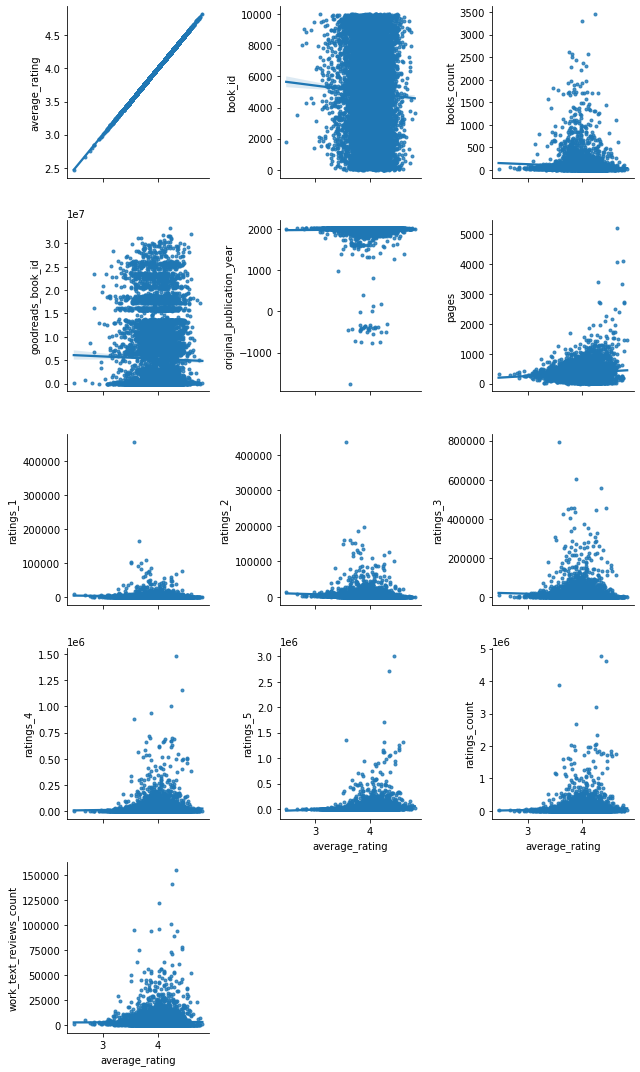

In [37]:
g = sns.FacetGrid(pd.DataFrame(num_col), col=0, col_wrap=3, sharey=False)

for ax, x_var in zip(g.axes, num_col):
    sns.regplot(data=books, y=x_var, x="average_rating", ax=ax, marker=".")
    
g.tight_layout()

Observations:
- There are some books with unusually high number of ratings and reviews. 
- There are books with original publication years reflected as negative values. These could be books written before 0 AD. We can consider to remove them for our analysis.
- Books with more printed editions (higher books_count) does not necessarily have higher ratings.


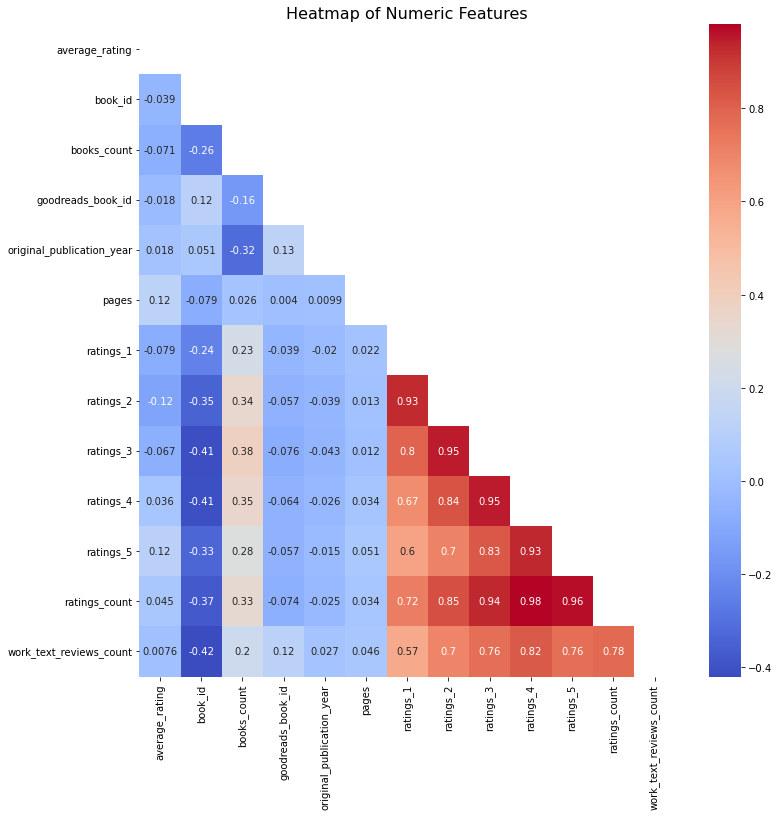

In [38]:
# Plotting a heatmap to visually examine the correlation of numeric features 

plt.figure(figsize=(12,12))

mask = np.zeros_like(books.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(books.corr(), mask=mask, annot=True, cmap='coolwarm')

plt.title('Heatmap of Numeric Features', fontsize = 16);

The features does not have high correlation with average book ratings.

#### Highest rated books

In [39]:
# Get top 10 highest rated books
top_rated_books = books.sort_values('average_rating', ascending = False)

top_rated_books[['title','authors','average_rating']].head(10)

,title,authors,average_rating
3289,The Complete Calvin and Hobbes,[Bill Watterson],4.82
806,"Words of Radiance (The Stormlight Archive, #2)",[Brandon Sanderson],4.77
2990,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","[J.K. Rowling, Mary GrandPré]",4.77
6580,ESV Study Bible,"[Anonymous, Lane T. Dennis, Wayne A. Grudem]",4.76
7173,Mark of the Lion Trilogy,[Francine Rivers],4.76
3983,It's a Magical World: A Calvin and Hobbes Coll...,[Bill Watterson],4.75
5449,There's Treasure Everywhere: A Calvin and Hobb...,[Bill Watterson],4.74
387,"Harry Potter Boxset (Harry Potter, #1-7)",[J.K. Rowling],4.74
3387,"Harry Potter Collection (Harry Potter, #1-6)",[J.K. Rowling],4.73
5867,The Indispensable Calvin and Hobbes,[Bill Watterson],4.73


#### Most popular books

In [40]:
# Get top 10 most popular books, based on number of ratings
popular_books = books.sort_values('ratings_count', ascending = False)

popular_books[['title','authors','average_rating','ratings_count']].head(10)

,title,authors,average_rating,ratings_count
0,"The Hunger Games (The Hunger Games, #1)",[Suzanne Collins],4.34,4780653
1,Harry Potter and the Sorcerer's Stone (Harry P...,"[J.K. Rowling, Mary GrandPré]",4.44,4602479
2,"Twilight (Twilight, #1)",[Stephenie Meyer],3.57,3866839
3,To Kill a Mockingbird,[Harper Lee],4.25,3198671
4,The Great Gatsby,[F. Scott Fitzgerald],3.89,2683664
5,The Fault in Our Stars,[John Green],4.26,2346404
6,The Hobbit,[J.R.R. Tolkien],4.25,2071616
7,The Catcher in the Rye,[J.D. Salinger],3.79,2044241
9,Pride and Prejudice,[Jane Austen],4.24,2035490
8,"Angels & Demons (Robert Langdon, #1)",[Dan Brown],3.85,2001311


In [41]:
# Top 10 most popular books based on most number of written reviews
textreview_books = books.sort_values('work_text_reviews_count', ascending = False)

textreview_books[['title','authors','average_rating','ratings_count', 'work_text_reviews_count']].head(10)

,title,authors,average_rating,ratings_count,work_text_reviews_count
0,"The Hunger Games (The Hunger Games, #1)",[Suzanne Collins],4.34,4780653,155254
5,The Fault in Our Stars,[John Green],4.26,2346404,140739
26,Gone Girl,[Gillian Flynn],4.03,512475,121614
11,"Divergent (Divergent, #1)",[Veronica Roth],4.24,1903563,101023
16,"Mockingjay (The Hunger Games, #3)",[Suzanne Collins],4.03,1719760,96274
2,"Twilight (Twilight, #1)",[Stephenie Meyer],3.57,3866839,95009
41,The Book Thief,[Markus Zusak],4.36,1159741,93611
54,The Girl on the Train,[Paula Hawkins],3.88,1008778,93600
14,"Catching Fire (The Hunger Games, #2)",[Suzanne Collins],4.30,1831039,88538
27,The Help,[Kathryn Stockett],4.45,1531753,78204


#### Average rating given

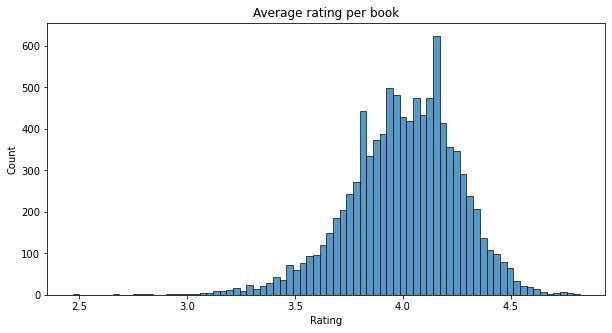

In [42]:
# Plot average rating given to books
plt.figure(figsize=(10,5))
ax = sns.histplot(data=books,x='average_rating')
ax.set_title('Average rating per book')
ax.set_xlabel('Rating');


In [43]:
books['average_rating'].describe()

count    9645.000000
mean        4.003885
std         0.252979
min         2.470000
25%         3.850000
50%         4.020000
75%         4.180000
max         4.820000
Name: average_rating, dtype: float64

The mean rating given is 4.0, with 25th percentile already at 3.85. Users seem to give a higher rating, as book ratings under 4.0 could be considered below average books.

#### Top books for each rating score

In [44]:
rated_1 = books.sort_values('ratings_1', ascending = False)

rated_1[['title','authors','ratings_1', 'average_rating','ratings_count']].head(10)

,title,authors,ratings_1,average_rating,ratings_count
2,"Twilight (Twilight, #1)",[Stephenie Meyer],456191,3.57,3866839
30,"Fifty Shades of Grey (Fifty Shades, #1)",[E.L. James],165455,3.67,1338493
7,The Catcher in the Rye,[J.D. Salinger],109383,3.79,2044241
42,"New Moon (Twilight, #2)",[Stephenie Meyer],102837,3.52,1149630
49,"Breaking Dawn (Twilight, #4)",[Stephenie Meyer],100994,3.70,1070245
35,"Eat, Pray, Love",[Elizabeth Gilbert],100373,3.51,1181647
24,Lord of the Flies,[William Golding],92779,3.64,1605019
4,The Great Gatsby,[F. Scott Fitzgerald],86236,3.89,2683664
45,"Eclipse (Twilight, #3)",[Stephenie Meyer],83094,3.69,1134511
8,"Angels & Demons (Robert Langdon, #1)",[Dan Brown],77841,3.85,2001311


In [45]:
rated_2 = books.sort_values('ratings_2', ascending = False)

rated_2[['title','authors','ratings_2', 'average_rating','ratings_count']].head(10)

,title,authors,ratings_2,average_rating,ratings_count
2,"Twilight (Twilight, #1)",[Stephenie Meyer],436802,3.57,3866839
4,The Great Gatsby,[F. Scott Fitzgerald],197621,3.89,2683664
7,The Catcher in the Rye,[J.D. Salinger],185520,3.79,2044241
42,"New Moon (Twilight, #2)",[Stephenie Meyer],160660,3.52,1149630
24,Lord of the Flies,[William Golding],160295,3.64,1605019
25,Romeo and Juliet,"[William Shakespeare, Robert Jackson]",153179,3.73,1628519
30,"Fifty Shades of Grey (Fifty Shades, #1)",[E.L. James],152293,3.67,1338493
35,"Eat, Pray, Love",[Elizabeth Gilbert],149549,3.51,1181647
8,"Angels & Demons (Robert Langdon, #1)",[Dan Brown],145740,3.85,2001311
7892,Animal Farm,"[George Orwell, Boris Grabnar, Celâl Üster, Ce...",135147,3.87,1881700


In [46]:
rated_3 = books.sort_values('ratings_3', ascending = False)

rated_3[['title','authors','ratings_3', 'average_rating','ratings_count']].head(10)

,title,authors,ratings_3,average_rating,ratings_count
2,"Twilight (Twilight, #1)",[Stephenie Meyer],793319,3.57,3866839
4,The Great Gatsby,[F. Scott Fitzgerald],606158,3.89,2683664
0,"The Hunger Games (The Hunger Games, #1)",[Suzanne Collins],560092,4.34,4780653
8,"Angels & Demons (Robert Langdon, #1)",[Dan Brown],458429,3.85,2001311
7,The Catcher in the Rye,[J.D. Salinger],455042,3.79,2044241
1,Harry Potter and the Sorcerer's Stone (Harry P...,"[J.K. Rowling, Mary GrandPré]",455024,4.44,4602479
25,Romeo and Juliet,"[William Shakespeare, Robert Jackson]",452673,3.73,1628519
3,To Kill a Mockingbird,[Harper Lee],446835,4.25,3198671
7892,Animal Farm,"[George Orwell, Boris Grabnar, Celâl Üster, Ce...",433432,3.87,1881700
24,Lord of the Flies,[William Golding],425648,3.64,1605019


In [47]:
rated_4 = books.sort_values('ratings_4', ascending = False)

rated_4[['title','authors','ratings_4', 'average_rating','ratings_count']].head(10)

,title,authors,ratings_4,average_rating,ratings_count
0,"The Hunger Games (The Hunger Games, #1)",[Suzanne Collins],1481305,4.34,4780653
1,Harry Potter and the Sorcerer's Stone (Harry P...,"[J.K. Rowling, Mary GrandPré]",1156318,4.44,4602479
3,To Kill a Mockingbird,[Harper Lee],1001952,4.25,3198671
4,The Great Gatsby,[F. Scott Fitzgerald],936012,3.89,2683664
2,"Twilight (Twilight, #1)",[Stephenie Meyer],875073,3.57,3866839
8,"Angels & Demons (Robert Langdon, #1)",[Dan Brown],716569,3.85,2001311
7892,Animal Farm,"[George Orwell, Boris Grabnar, Celâl Üster, Ce...",698642,3.87,1881700
5,The Fault in Our Stars,[John Green],698471,4.26,2346404
7891,1984,"[George Orwell, Marcelo Pen, Erich Fromm, Amaz...",692021,4.14,1956832
14,"Catching Fire (The Hunger Games, #2)",[Suzanne Collins],687238,4.30,1831039


In [48]:
rated_5 = books.sort_values('ratings_5', ascending = False)

rated_5[['title','authors','ratings_5', 'average_rating','ratings_count']].head(10)

,title,authors,ratings_5,average_rating,ratings_count
1,Harry Potter and the Sorcerer's Stone (Harry P...,"[J.K. Rowling, Mary GrandPré]",3011543,4.44,4602479
0,"The Hunger Games (The Hunger Games, #1)",[Suzanne Collins],2706317,4.34,4780653
3,To Kill a Mockingbird,[Harper Lee],1714267,4.25,3198671
2,"Twilight (Twilight, #1)",[Stephenie Meyer],1355439,3.57,3866839
21,Harry Potter and the Deathly Hallows (Harry Po...,"[J.K. Rowling, Mary GrandPré]",1318227,4.61,1746574
5,The Fault in Our Stars,[John Green],1311871,4.26,2346404
15,Harry Potter and the Prisoner of Azkaban (Harr...,"[J.K. Rowling, Mary GrandPré, Rufus Beck]",1266670,4.53,1832823
20,Harry Potter and the Goblet of Fire (Harry Pot...,"[J.K. Rowling, Mary GrandPré]",1195045,4.53,1753043
23,Harry Potter and the Half-Blood Prince (Harry ...,"[J.K. Rowling, Mary GrandPré]",1161491,4.54,1678823
9,Pride and Prejudice,[Jane Austen],1155673,4.24,2035490


The ratings count and rating score may not be a good estimator of the quality of a book. For example, Twilight appeared in the top 10 list for all 5 rating scores due to its high rating count, with an average rating of 3.57. Could a weighted average rating taking into account both score and count be more suitable instead?

#### Highest weighted rating books

In [49]:
# Normalise both rating_count and average_rating

cols = ['ratings_count','average_rating']
scaler = MinMaxScaler()
df = books[['title', 'authors', 'average_rating', 'ratings_count']].copy()
df[cols] = scaler.fit_transform(df[cols])

In [50]:
df['book_score'] = 0.5 * df['ratings_count'] + 0.5 * df['average_rating']

In [51]:
df_sorted = df.sort_values('book_score', ascending=False)
df_sorted.head(10)

,title,authors,average_rating,ratings_count,book_score
1,Harry Potter and the Sorcerer's Stone (Harry P...,"[J.K. Rowling, Mary GrandPré]",0.838298,0.962709,0.900503
0,"The Hunger Games (The Hunger Games, #1)",[Suzanne Collins],0.795745,1.000000,0.897872
3,To Kill a Mockingbird,[Harper Lee],0.757447,0.668895,0.713171
2,"Twilight (Twilight, #1)",[Stephenie Meyer],0.468085,0.808741,0.638413
21,Harry Potter and the Deathly Hallows (Harry Po...,"[J.K. Rowling, Mary GrandPré]",0.910638,0.364974,0.637806
15,Harry Potter and the Prisoner of Azkaban (Harr...,"[J.K. Rowling, Mary GrandPré, Rufus Beck]",0.876596,0.383026,0.629811
5,The Fault in Our Stars,[John Green],0.761702,0.490517,0.626110
20,Harry Potter and the Goblet of Fire (Harry Pot...,"[J.K. Rowling, Mary GrandPré]",0.876596,0.366328,0.621462
23,Harry Potter and the Half-Blood Prince (Harry ...,"[J.K. Rowling, Mary GrandPré]",0.880851,0.350794,0.615822
17,Harry Potter and the Order of the Phoenix (Har...,"[J.K. Rowling, Mary GrandPré]",0.846809,0.362628,0.604718


The list generated is quite similar to the Ratings-5 list.

#### Original publication year

In [52]:
books['original_publication_year'].sort_values()

1921   -1750.0
1981    -762.0
311     -750.0
5300    -750.0
71      -720.0
         ...  
9100    2017.0
6314    2017.0
8528    2017.0
6235    2017.0
7080    2017.0
Name: original_publication_year, Length: 9645, dtype: float64

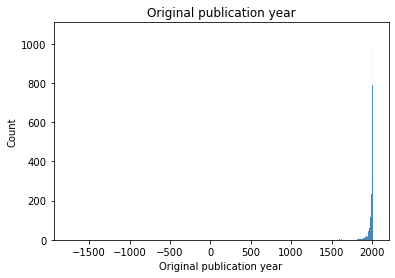

In [53]:
ax = sns.histplot(data=books,x='original_publication_year')
ax.set_title('Original publication year')
ax.set_xlabel('Original publication year');

In [54]:
# Filter publication year after 1500
new_books = books.loc[books['original_publication_year'] > 1500]

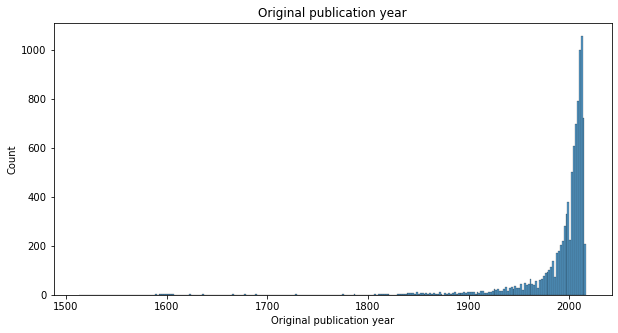

In [55]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=new_books,x='original_publication_year')
ax.set_title('Original publication year')
ax.set_xlabel('Original publication year');

In [56]:
(books['original_publication_year'] >= 1900).value_counts()

True     9287
False     358
Name: original_publication_year, dtype: int64

In [57]:
(books['original_publication_year'] >= 1900).value_counts(normalize=True)

True     0.962882
False    0.037118
Name: original_publication_year, dtype: float64

Most books are published after year 1900 (96% of dataset). We will drop the rows before year 1900.

In [58]:
books = books.drop(books[books['original_publication_year'] < 1900 ].index)

#### List of Authors

In [59]:
books.authors.value_counts()

[Stephen King]                                          59
[Nora Roberts]                                          58
[Dean Koontz]                                           45
[Terry Pratchett]                                       42
[Agatha Christie]                                       38
                                                        ..
[Hester Browne]                                          1
[Rebecca Housel, J. Jeremy Wisnewski, William Irwin]     1
[Eric Berne]                                             1
[Rachel Hauck]                                           1
[John Keegan]                                            1
Name: authors, Length: 4163, dtype: int64

The `authors` consist of names of authors and illustrators. Each combination/list exists as an unique count, we will need to split it.

In [60]:
authors_list = books['authors']

In [61]:
splitted_authors = authors_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_authors.name = 'authors'
splitted_authors.head()

0    Suzanne Collins
1       J.K. Rowling
1      Mary GrandPré
2    Stephenie Meyer
3         Harper Lee
Name: authors, dtype: object

In [62]:
df_edited_authors = books[['title', 'average_rating', 'ratings_count', 'authors']].drop('authors', axis=1).join(splitted_authors)
df_edited_authors.head()

,title,average_rating,ratings_count,authors
0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,Suzanne Collins
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,J.K. Rowling
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,Mary GrandPré
2,"Twilight (Twilight, #1)",3.57,3866839,Stephenie Meyer
3,To Kill a Mockingbird,4.25,3198671,Harper Lee


In [63]:
books.shape, df_edited_authors.shape

((9287, 18), (12066, 4))

In [64]:
df_edited_authors.authors.value_counts()

James Patterson     93
Stephen King        91
Nora Roberts        65
Dean Koontz         61
Terry Pratchett     50
                    ..
Paul Bowles          1
Mario Spezi          1
Daniel Woodrell      1
Jessica Seinfeld     1
John Keegan          1
Name: authors, Length: 5218, dtype: int64

In [65]:
authors_most_with_books = pd.DataFrame(data = df_edited_authors.authors.value_counts(), 
                                      ).reset_index()

In [66]:
authors_most_with_books.head(10)

,index,authors
0,James Patterson,93
1,Stephen King,91
2,Nora Roberts,65
3,Dean Koontz,61
4,Terry Pratchett,50
5,Agatha Christie,42
6,Neil Gaiman,41
7,J.D. Robb,41
8,Meg Cabot,37
9,Janet Evanovich,36


James Patterson is the most occurring name in the author list.

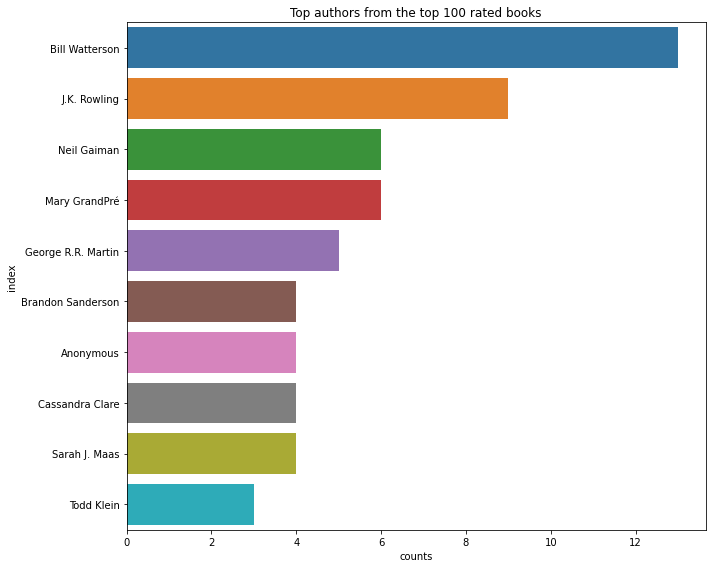

In [67]:
# Authors of top 100 rated books
top_100 = books.sort_values(['average_rating'], ascending = False).iloc[0:100,:]

# transform authors to list and get top 10 authors that appear in top 100 books
authors_top_100 = pd.Series([x for item in top_100['authors'] for x in item]).value_counts().to_frame('counts').reset_index()
authors_top_100 = authors_top_100.iloc[0:10,:]

# #draw graph
plt.figure(figsize=(10,8))
ax = sns.barplot(data=authors_top_100, x ='counts', y='index')
ax.set_title('Top authors from the top 100 rated books')
plt.tight_layout()
plt.show()

Let's see which titles have 'Anonymous' authors:

In [68]:
top_100[top_100['authors'].astype(str).str.contains("Anonymous")]

,authors,average_rating,book_id,books_count,description,genres,goodreads_book_id,image_url,original_publication_year,pages,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,ratings_count,title,work_text_reviews_count
6580,"[Anonymous, Lane T. Dennis, Wayne A. Grudem]",4.76,7947,96,The ESV Study Bible was designed to help you u...,"[christian, nonfiction, religion, classics, hi...",5031805,https://images.gr-assets.com/books/1410151002m...,2002.0,2750.0,98,90,367,1152,9077,8953,ESV Study Bible,262
5115,"[Anonymous, Ronald A. Beers, Ronald A. Beers]",4.67,5919,183,- Application Notes provide penetrating insigh...,"[christian, religion, nonfiction, spirituality...",265205,https://s.gr-assets.com/assets/nophoto/book/11...,1992.0,2400.0,239,207,670,1992,11666,13614,Life Application Study Bible: NIV,270
4217,[Anonymous],4.66,4778,627,The English Standard Version (ESV) Bible is an...,"[christian, religion, nonfiction, classics, sp...",5883777,https://images.gr-assets.com/books/1328227151m...,2001.0,1328.0,652,431,1082,1909,19162,17863,The Holy Bible: English Standard Version,591
2066,[Anonymous],4.61,2236,1101,The New International Version is the world's m...,"[religion, christian, nonfiction, classics, sp...",280111,https://images.gr-assets.com/books/1382581321m...,1909.0,1248.0,1637,1131,2091,3664,37471,40430,Holy Bible: New International Version,1804


#### List of Book Genres

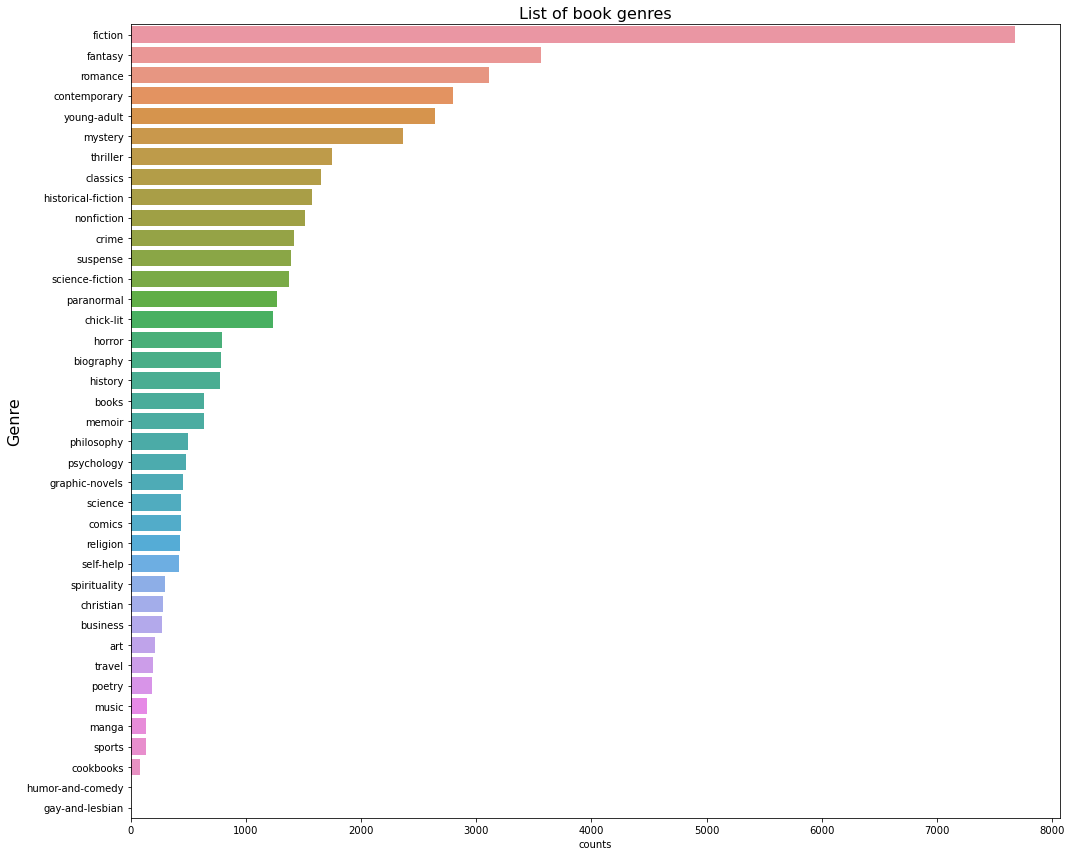

In [69]:
genre_df = pd.Series([x for item in books['genres'] for x in item]).value_counts().to_frame('counts').reset_index()

plt.figure(figsize=(15,12))
ax = sns.barplot(data=genre_df, x="counts", y ="index")
ax.set_title("List of book genres", fontsize=16)
ax.set_ylabel("Genre", fontsize=16)
plt.tight_layout()
plt.show()

Fiction is the most common genre.

#### Number of Pages

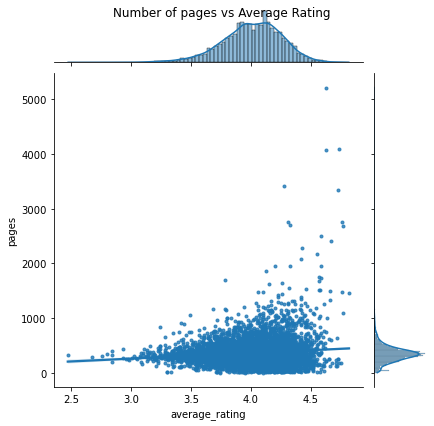

In [70]:
ax = sns.jointplot(data=books,y='pages', x='average_rating', kind="reg", marker=".")
ax.fig.suptitle("Number of pages vs Average Rating");

In [71]:
books['pages'].describe()

count    9287.000000
mean      359.623452
std       211.953923
min         0.000000
25%       256.000000
50%       339.000000
75%       421.000000
max      5216.000000
Name: pages, dtype: float64

In [72]:
books[books['pages'] > 2000]['title'].values

array(['Harry Potter Boxset (Harry Potter, #1-7)',
       'The Little House Collection (Little House, #1-9)',
       'The Complete Anne of Green Gables Boxed Set (Anne of Green Gables, #1-8)',
       'The Twilight Saga Complete Collection  (Twilight, #1-4 + 3.5)',
       'A Song of Ice and Fire (A Song of Ice and Fire, #1-4)',
       'A Song of Ice and Fire (A Song of Ice and Fire, #1-5)',
       'Mistborn Trilogy Boxed Set (Mistborn, #1-3)',
       'Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)',
       'Harry Potter Collection (Harry Potter, #1-6)',
       'Life Application Study Bible: NIV', 'ESV Study Bible',
       'City of Bones / City of Ashes / City of Glass / City of Fallen Angels / City of Lost Souls (The Mortal Instruments, #1-5)',
       'A Series of Unfortunate Events Box: The Complete Wreck (Books 1-13)',
       'The Wheel of Time: Boxed Set #1 (Wheel of Time, #1-3)'],
      dtype=object)

Most books fall between 250 to 420 pages. Titles with many pages are boxed/collection set.

In [73]:
books.head()

,authors,average_rating,book_id,books_count,description,genres,goodreads_book_id,image_url,original_publication_year,pages,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,ratings_count,title,work_text_reviews_count
0,[Suzanne Collins],4.34,1,272,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"[young-adult, fiction, fantasy, science-fictio...",2767052,https://images.gr-assets.com/books/1447303603m...,2008.0,374.0,66715,127936,560092,1481305,2706317,4780653,"The Hunger Games (The Hunger Games, #1)",155254
1,"[J.K. Rowling, Mary GrandPré]",4.44,2,491,Harry Potter's life is miserable. His parents ...,"[fantasy, fiction, young-adult, classics]",3,https://images.gr-assets.com/books/1474154022m...,1997.0,309.0,75504,101676,455024,1156318,3011543,4602479,Harry Potter and the Sorcerer's Stone (Harry P...,75867
2,[Stephenie Meyer],3.57,3,226,About three things I was absolutely positive.\...,"[young-adult, fantasy, romance, fiction, paran...",41865,https://images.gr-assets.com/books/1361039443m...,2005.0,501.0,456191,436802,793319,875073,1355439,3866839,"Twilight (Twilight, #1)",95009
3,[Harper Lee],4.25,4,487,The unforgettable novel of a childhood in a sl...,"[classics, fiction, historical-fiction, young-...",2657,https://images.gr-assets.com/books/1361975680m...,1960.0,324.0,60427,117415,446835,1001952,1714267,3198671,To Kill a Mockingbird,72586
4,[F. Scott Fitzgerald],3.89,5,1356,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"[classics, fiction, historical-fiction, romance]",4671,https://images.gr-assets.com/books/1490528560m...,1925.0,200.0,86236,197621,606158,936012,947718,2683664,The Great Gatsby,51992


#### Cleaning Book Description

In [74]:
# Take a look at random title and its description
print(books['title'][5566])
print(books['description'][5566])

The Water Knife
In the American Southwest, Nevada, Arizona, and California skirmish for dwindling shares of the Colorado River. Into the fray steps Angel Velasquez, leg-breaker, assassin, and spy. A Las Vegas water knife, Angel "cuts" water for his boss, Catherine Case, ensuring that her luxurious developments can bloom in the desert, so the rich can stay wet while the poor get dust. When rumors of a game-changing water source surface in drought-ravaged Phoenix, it seems California is making a play to monopolize the life-giving flow of the river, and Angel is sent to investigate. There, he encounters Lucy Monroe, a drought-hardened journalist, and Maria Villarosa, a young refugee who survives by her wits in a city that despises everything she represents. For Angel, Lucy, and Maria, time is running out and their only hope for survival rests in each other’s hands. But when water is more valuable than gold, alliances shift like sand, and the only thing for certain is that someone will hav

In [75]:
print(books['title'][2468])
print(books['description'][2468])

King of Thorns (The Broken Empire, #2)
The boy who would be King has gained the throne…Prince Honorious Jorg Ancrath vowed when he was nine to avenge his slaughtered mother and brother—and punish his father for not doing so. When he was fifteen, he began to fulfill that vow. Now he is eighteen—and he must hold on by strength of arms to what he took by torture and treachery.King Jorg is a man haunted: by the ghost of a young boy, by a mysterious copper box, by his desire for the woman who rides with his enemy. Plagued by nightmares of the atrocities he committed, and of the atrocities committed against him when he was a child, he is filled with rage. And even as his need for revenge continues to consume him, twenty thousand men march toward the gates of his castle. His enemy is far stronger than him. Jorg knows that he cannot win a fair fight.But he has found, in a chamber hidden beneath the castle, ancient and long-lost artifacts. Some might call them magic. Jorg is not certain—all he 

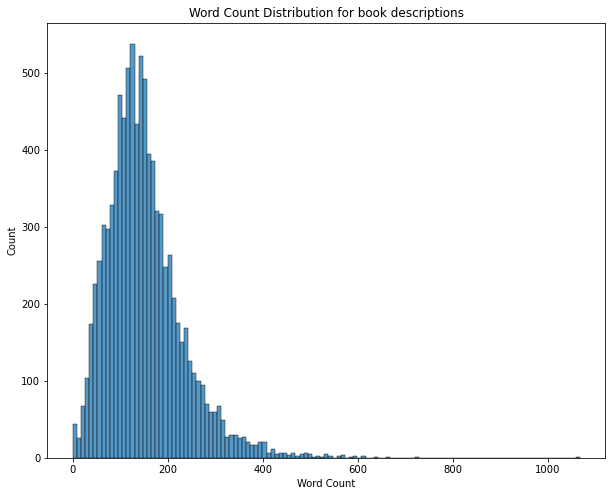

In [76]:
# Plot word count distribution
books['word_count'] = books['description'].apply(lambda x: len(str(x).split())) 
plt.figure(figsize=(10,8))

ax = sns.histplot(data=books,x='word_count')
ax.set_title('Word Count Distribution for book descriptions')
ax.set_xlabel('Word Count');

Let's clean up book description.

In [77]:
# List of stopwords
stop_words = set(stopwords.words('english'))

In [78]:
# Create function to clean description text

def clean_text(text):
    
    # 1. Remove HTML.
    html_removed = BeautifulSoup(text).get_text()
    
    # 2. Remove http.
    http_removed = re.sub(r"http\S+", "", html_removed)
    
    # 3. Remove www.
    www_removed = re.sub(r"www\S+", "", http_removed)
    
    # 4. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ",  www_removed)
    
    # 5. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
   
    # 6. Remove stopwords.
    meaningful_words = [w for w in words if not w in stop_words]
    
    # 7. Return the result.
    return (" ".join(meaningful_words))

In [79]:
books['clean_desc'] = books['description'].apply(clean_text)

C:\Users\chang\anaconda3\envs\dsi30\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [80]:
books['clean_desc']

0       winning means fame fortune losing means certai...
1       harry potter life miserable parents dead stuck...
2       three things absolutely positive first edward ...
3       unforgettable novel childhood sleepy southern ...
4       alternate cover edition isbn isbn great gatsby...
                              ...                        
9640    high school girl harlem geneva settle target r...
9641    karen marie moning latest installment epic new...
9642    year computers new superpowers control control...
9643    cia agent two year old child stolen night brut...
9644    first world war created modern world conflict ...
Name: clean_desc, Length: 9287, dtype: object

In [81]:
print(books['title'][5566])
print(books['clean_desc'][5566])

The Water Knife
american southwest nevada arizona california skirmish dwindling shares colorado river fray steps angel velasquez leg breaker assassin spy las vegas water knife angel cuts water boss catherine case ensuring luxurious developments bloom desert rich stay wet poor get dust rumors game changing water source surface drought ravaged phoenix seems california making play monopolize life giving flow river angel sent investigate encounters lucy monroe drought hardened journalist maria villarosa young refugee survives wits city despises everything represents angel lucy maria time running hope survival rests hands water valuable gold alliances shift like sand thing certain someone bleed anyone hopes drink


CountVectorizer will be used to obtain the most frequently occurring words from `description`.

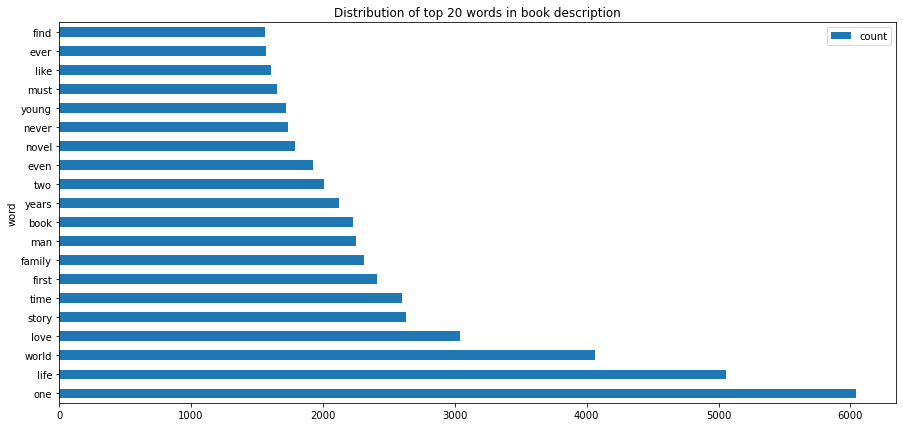

In [130]:
# Convert book description into vectors using CountVectorizer
cvec = CountVectorizer(ngram_range=(1, 1), lowercase = False) # Will be looking at single words
cvec_matrix = cvec.fit_transform(books['clean_desc'])
total_words = cvec_matrix.sum(axis=0) 

# Find the word frequency
freq = [(word, total_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
freq = sorted(freq, key = lambda x: x[1], reverse=True)

# Convert into dataframe 
word = pd.DataFrame(freq)
word.rename(columns = {0:'word', 1: 'count'}, inplace = True) 

#Take first 20 records
word = word.head(20)

#Plot bigram distribution
word.plot(x ='word', y='count', kind = 'barh',
            title = "Distribution of top 20 words in book description",
            figsize = (15,7));

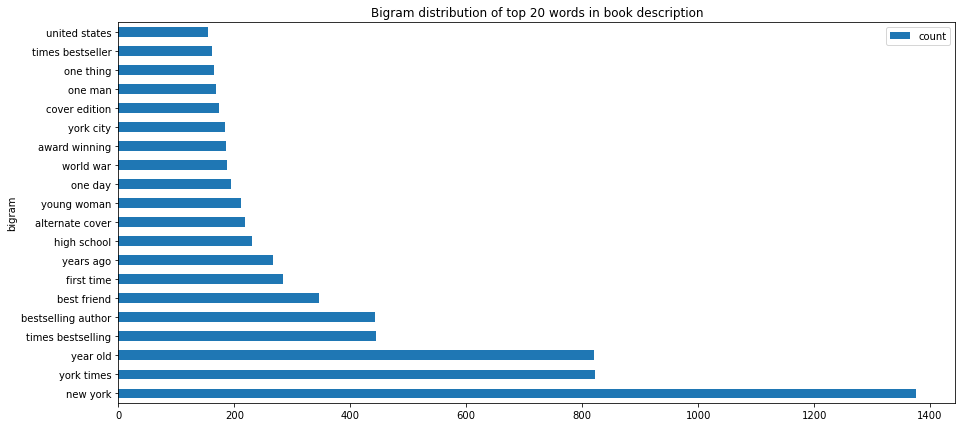

In [83]:
# Convert book description into vectors using CountVectorizer
cvec = CountVectorizer(ngram_range=(2, 2), lowercase = False) # Will be looking at bigrams 
cvec_matrix = cvec.fit_transform(books['clean_desc'])
total_words = cvec_matrix.sum(axis=0) 

# Find the word frequency
freq = [(word, total_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
freq = sorted(freq, key = lambda x: x[1], reverse=True)

# Convert into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 

#Take first 20 records
bigram = bigram.head(20)

#Plot bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'barh',
            title = "Bigram distribution of top 20 words in book description",
            figsize = (15,7));

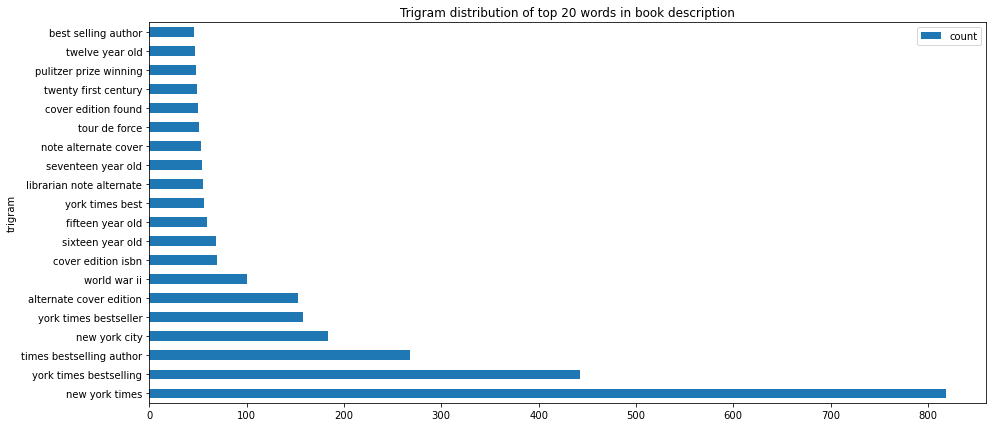

In [84]:
# Convert book description into vectors using CountVectorizer
cvec = CountVectorizer(ngram_range=(3, 3), lowercase = False) # Will be looking at trigrams
cvec_matrix = cvec.fit_transform(books['clean_desc'])
total_words = cvec_matrix.sum(axis=0) 

# Find the word frequency
freq = [(word, total_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
freq = sorted(freq, key = lambda x: x[1], reverse=True)

# Convert into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 

# Take first 20 records
trigram = trigram.head(20)

# Plot trigram distribution
trigram.plot(x ='trigram', y='count', kind = 'barh',
             title = "Trigram distribution of top 20 words in book description",
             figsize = (15,7));

The book descriptions are filled with phrases like "new york times bestseller", "best selling author" and even phrases like "alternate cover edition". Let's try to remove these common words.

In [85]:
# Update list of stopwords
stop_words = set(stopwords.words('english'))
add_stopwords = ['new', 'york', 'times', 'bestselling', 'author', 'edition',
                 'cover', 'alternate', 'note', 'pulitzer', 'prize', 'selling',
                 'year', 'old', 'isbn'
                ]

stop_words = stop_words.union(add_stopwords)

In [86]:
books['clean_desc'] = books['clean_desc'].apply(clean_text)

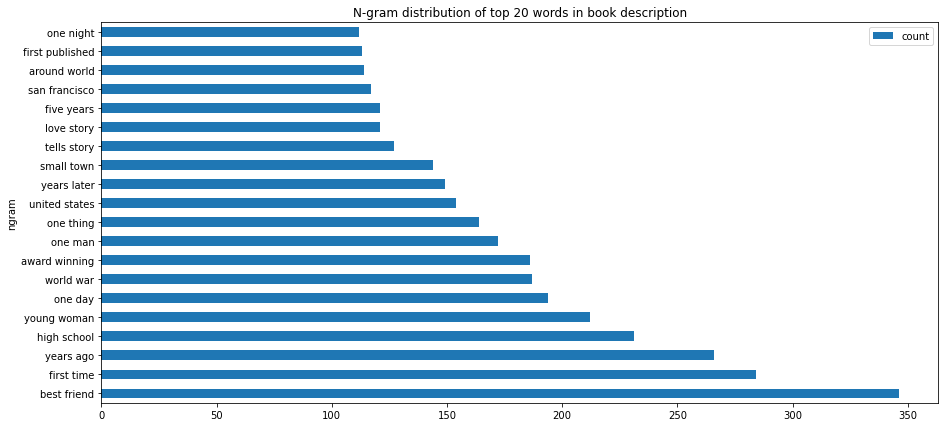

In [87]:
# Convert book description into vectors using CountVectorizer
cvec = CountVectorizer(ngram_range=(2, 3), lowercase = False) # Will be looking at N-grams
cvec_matrix = cvec.fit_transform(books['clean_desc'])
total_words = cvec_matrix.sum(axis=0) 

# Find the word frequency
freq = [(word, total_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
freq = sorted(freq, key = lambda x: x[1], reverse=True)

# Convert into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 

# Take first 20 records
ngram = ngram.head(20)

# Plot trigram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh',
             title = "N-gram distribution of top 20 words in book description",
             figsize = (15,7));

The `clean_desc` seems better now.

In [88]:
books.head(2)

,authors,average_rating,book_id,books_count,description,genres,goodreads_book_id,image_url,original_publication_year,pages,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,ratings_count,title,work_text_reviews_count,word_count,clean_desc
0,[Suzanne Collins],4.34,1,272,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"[young-adult, fiction, fantasy, science-fictio...",2767052,https://images.gr-assets.com/books/1447303603m...,2008.0,374.0,66715,127936,560092,1481305,2706317,4780653,"The Hunger Games (The Hunger Games, #1)",155254,147,winning means fame fortune losing means certai...
1,"[J.K. Rowling, Mary GrandPré]",4.44,2,491,Harry Potter's life is miserable. His parents ...,"[fantasy, fiction, young-adult, classics]",3,https://images.gr-assets.com/books/1474154022m...,1997.0,309.0,75504,101676,455024,1156318,3011543,4602479,Harry Potter and the Sorcerer's Stone (Harry P...,75867,220,harry potter life miserable parents dead stuck...


In [89]:
# Convert year to int format
books['original_publication_year'] = books['original_publication_year'].astype(np.int64)

In [90]:
# Rename image_url
books.rename({'image_url': 'cover_image'}, axis=1, inplace=True)

In [91]:
# Convert Goodreads book id into url
books['goodreads_link'] = 'https://www.goodreads.com/book/show/' + books['goodreads_book_id'].astype(str)

In [92]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9287 entries, 0 to 9644
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   authors                    9287 non-null   object 
 1   average_rating             9287 non-null   float64
 2   book_id                    9287 non-null   int64  
 3   books_count                9287 non-null   int64  
 4   description                9287 non-null   object 
 5   genres                     9287 non-null   object 
 6   goodreads_book_id          9287 non-null   int64  
 7   cover_image                9287 non-null   object 
 8   original_publication_year  9287 non-null   int64  
 9   pages                      9287 non-null   float64
 10  ratings_1                  9287 non-null   int64  
 11  ratings_2                  9287 non-null   int64  
 12  ratings_3                  9287 non-null   int64  
 13  ratings_4                  9287 non-null   int64

In [93]:
# Drop columns that will not be used for analysis
books.drop(columns = ['books_count',
                      'ratings_1',
                      'ratings_2',
                      'ratings_3',
                      'ratings_4',
                      'ratings_5',
                      'work_text_reviews_count',
                      'word_count',
                      'description',
                      'goodreads_book_id',
                      'pages',
                      'original_publication_year'
                     ], inplace=True)

In [94]:
books.head()

,authors,average_rating,book_id,genres,cover_image,ratings_count,title,clean_desc,goodreads_link
0,[Suzanne Collins],4.34,1,"[young-adult, fiction, fantasy, science-fictio...",https://images.gr-assets.com/books/1447303603m...,4780653,"The Hunger Games (The Hunger Games, #1)",winning means fame fortune losing means certai...,https://www.goodreads.com/book/show/2767052
1,"[J.K. Rowling, Mary GrandPré]",4.44,2,"[fantasy, fiction, young-adult, classics]",https://images.gr-assets.com/books/1474154022m...,4602479,Harry Potter and the Sorcerer's Stone (Harry P...,harry potter life miserable parents dead stuck...,https://www.goodreads.com/book/show/3
2,[Stephenie Meyer],3.57,3,"[young-adult, fantasy, romance, fiction, paran...",https://images.gr-assets.com/books/1361039443m...,3866839,"Twilight (Twilight, #1)",three things absolutely positive first edward ...,https://www.goodreads.com/book/show/41865
3,[Harper Lee],4.25,4,"[classics, fiction, historical-fiction, young-...",https://images.gr-assets.com/books/1361975680m...,3198671,To Kill a Mockingbird,unforgettable novel childhood sleepy southern ...,https://www.goodreads.com/book/show/2657
4,[F. Scott Fitzgerald],3.89,5,"[classics, fiction, historical-fiction, romance]",https://images.gr-assets.com/books/1490528560m...,2683664,The Great Gatsby,great gatsby f scott fitzgerald third book sta...,https://www.goodreads.com/book/show/4671


In [95]:
#Export cleaned dataset
books.to_csv('./dataset/books_clean.csv', index=False)

### Ratings

In [96]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


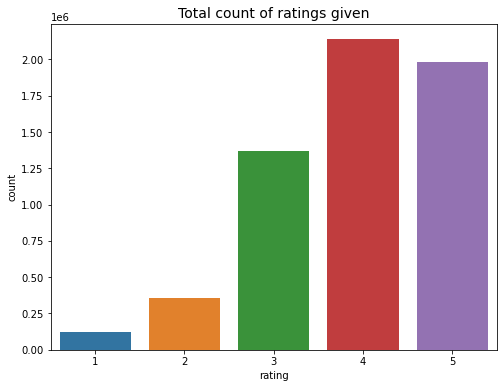

In [97]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='rating', data=ratings)
ax.set_title("Total count of ratings given", fontsize=14);

#### Number of ratings per user

In [98]:
ratings[ratings['user_id'] == 1]

,user_id,book_id,rating
0,1,258,5
75,1,268,3
76,1,5556,3
77,1,3638,3
78,1,1796,5
...,...,...,...
5704475,1,142,4
5704476,1,642,4
5704477,1,901,4
5704479,1,212,3


In [99]:
ratings_per_user = ratings.groupby(['user_id'])['rating'].count()
ratings_per_user

user_id
1        117
2         65
3         91
4        134
5        100
        ... 
53420    110
53421    110
53422    130
53423     77
53424    133
Name: rating, Length: 53424, dtype: int64

In [100]:
ratings_per_user.sort_values()

user_id
34590     19
43675     20
40753     21
51725     21
32128     21
        ... 
12381    199
28158    199
52036    199
12874    200
30944    200
Name: rating, Length: 53424, dtype: int64

In [101]:
ratings_per_user.sum()

5976479

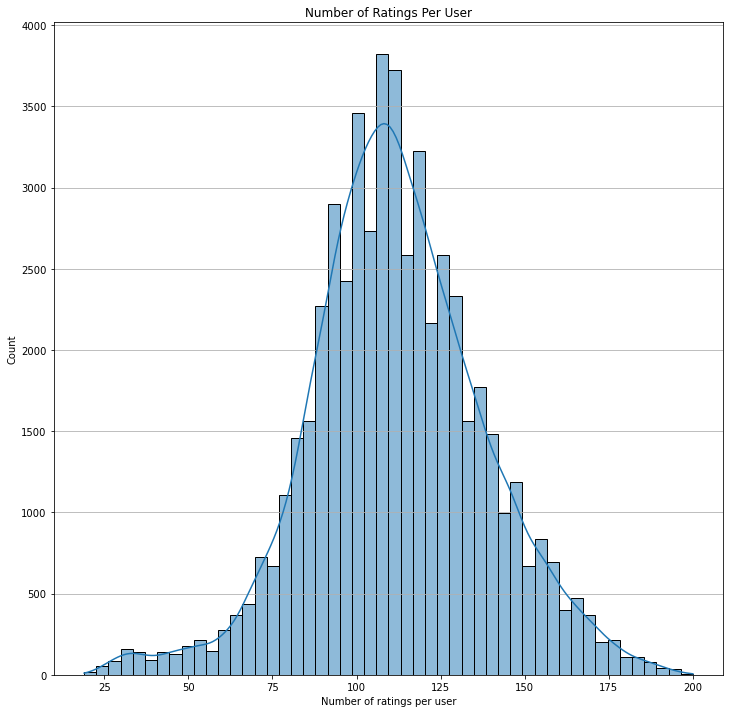

In [102]:
plt.figure(figsize=(12,12))
sns.histplot(data=ratings_per_user, bins=50, kde=True)

plt.grid(axis='y')
plt.title('Number of Ratings Per User')
plt.xlabel('Number of ratings per user')
plt.ylabel('Count');

#### Average rating per user

In [103]:
mean_rating_per_user = ratings.groupby('user_id')['rating'].mean()
mean_rating_per_user

user_id
1        3.589744
2        4.415385
3        1.736264
4        3.768657
5        4.040000
           ...   
53420    3.345455
53421    4.609091
53422    4.215385
53423    4.454545
53424    4.406015
Name: rating, Length: 53424, dtype: float64

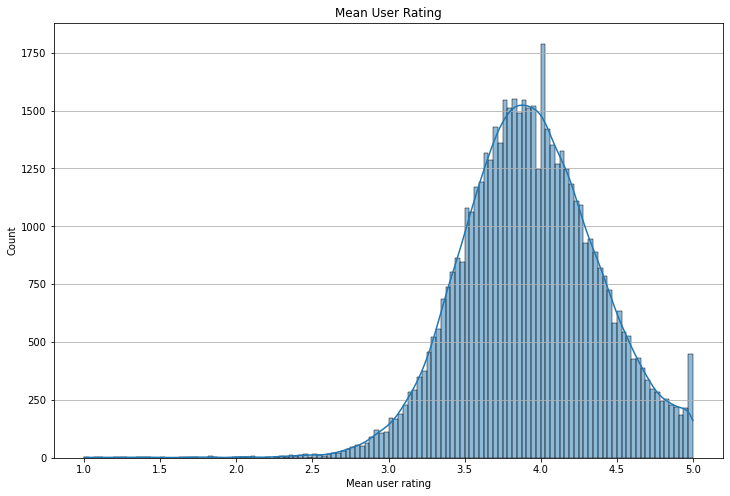

In [104]:
plt.figure(figsize=(12,8))
sns.histplot(data = mean_rating_per_user, bins='auto', kde=True);

plt.grid(axis='y')
plt.title('Mean User Rating')
plt.xlabel('Mean user rating')
plt.ylabel('Count');

#### Number of ratings per book

In [105]:
ratings_per_book = ratings.groupby('book_id')['book_id'].count()
ratings_per_book

book_id
1        22806
2        21850
3        16931
4        19088
5        16604
         ...  
9996       141
9997        93
9998       102
9999       130
10000      111
Name: book_id, Length: 10000, dtype: int64

In [106]:
ratings_per_book.sort_values().head(1000)

book_id
7803      8
9345     11
9486     24
1935     33
9315     36
       ... 
9756    115
5631    115
9312    115
9422    115
8426    115
Name: book_id, Length: 1000, dtype: int64

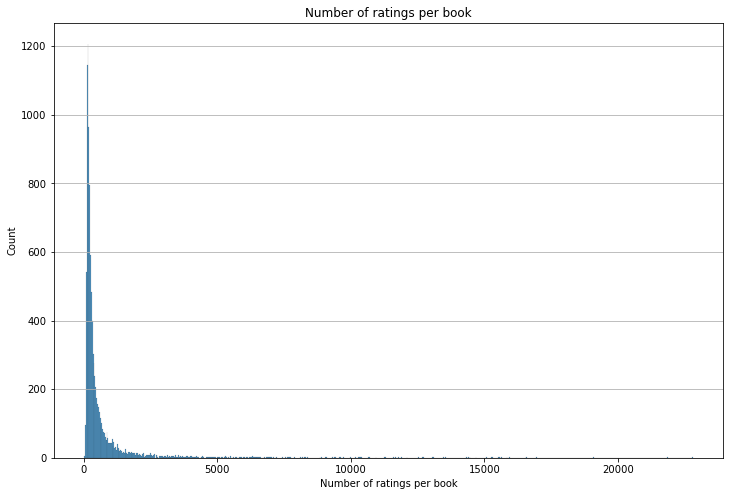

In [107]:
plt.figure(figsize=(12,8))
sns.histplot(data=ratings_per_book, bins='auto');
plt.grid(axis='y')
plt.title('Number of ratings per book')
plt.xlabel('Number of ratings per book')
plt.ylabel('Count');

Re-plot in logarithmic scale

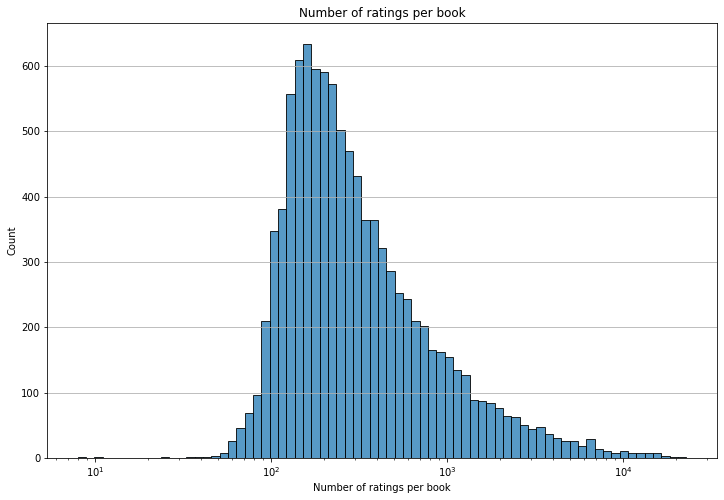

In [108]:
plt.figure(figsize=(12,8))
sns.histplot(data=ratings_per_book, bins='auto', log_scale=True);
plt.grid(axis='y')
plt.title('Number of ratings per book')
plt.xlabel('Number of ratings per book')
plt.ylabel('Count');

#### Reduce dataset dimensionality

We will filter out books and user ratings in order to reduce the dimensionality of data set.

In [109]:
book_id_df = pd.DataFrame(ratings['book_id'].value_counts())

In [110]:
book_id_df.describe(percentiles = [.5, .75, .8, .85, .9])

,book_id
count,10000.000000
mean,597.647900
std,1267.289788
min,8.000000
50%,248.000000
75%,503.000000
80%,631.000000
85%,829.150000
90%,1180.300000
max,22806.000000


In [111]:
user_id_df = pd.DataFrame(ratings['user_id'].value_counts())

In [112]:
user_id_df.describe(percentiles = [.5, .75, .8, .85, .9])

,user_id
count,53424.000000
mean,111.868804
std,26.071224
min,19.000000
50%,111.000000
75%,128.000000
80%,133.000000
85%,138.000000
90%,146.000000
max,200.000000


We will choose to keep books with at least 1000 ratings, and users with at least 135 ratings given.

In [113]:
min_book_ratings = 1000
filter_books = ratings['book_id'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 135
filter_users = ratings['user_id'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

new_ratings = ratings[(ratings['book_id'].isin(filter_books)) & (ratings['user_id'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(ratings.shape))
print('The new data frame shape:\t{}'.format(new_ratings.shape))

The original data frame shape:	(5976479, 3)
The new data frame shape:	(885453, 3)


In [114]:
new_ratings['book_id'].value_counts()

1       4539
2       4366
4       4132
5       3689
16      3593
        ... 
938       77
796       76
812       65
1110      65
1130      52
Name: book_id, Length: 1228, dtype: int64

In [115]:
new_ratings['user_id'].value_counts()

45554    186
46139    179
33065    176
18313    175
38798    174
        ... 
45418     14
25675     14
8861      14
46381     13
35839     12
Name: user_id, Length: 9231, dtype: int64

#### Long Tail Plot

C:\Users\chang\anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chang\anaconda3\envs\dsi30\lib\site-packages\recmetrics\plots.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  head = head.append(tail.head(1))


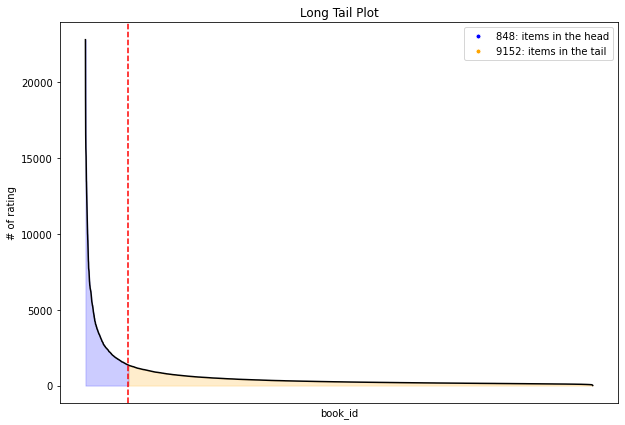

In [116]:
fig = plt.figure(figsize=(10, 7))
recmetrics.long_tail_plot(df=ratings, 
             item_id_column="book_id", 
             interaction_type="rating", 
             percentage=0.5,
             x_labels=False)

C:\Users\chang\anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chang\anaconda3\envs\dsi30\lib\site-packages\recmetrics\plots.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  head = head.append(tail.head(1))


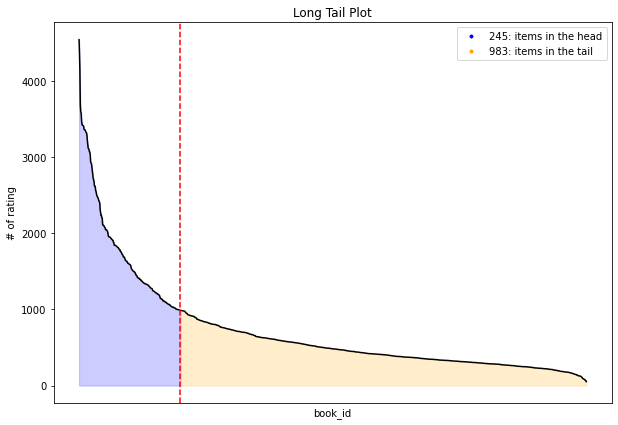

In [117]:
fig = plt.figure(figsize=(10, 7))
recmetrics.long_tail_plot(df=new_ratings, 
             item_id_column="book_id", 
             interaction_type="rating", 
             percentage=0.5,
             x_labels=False)

Typically, only a small percentage of items have a high volume of interactions, referred here as "head". Most items are in the "long tail", which makes up a small percentage of interactions.

A recommendation system can easily predict and recommend the popular books with large numbers of ratings. However, these books are already well-known and may not be useful for users to find out new and relevant books. Our recommendation system should aim to be relevant and useful for users.

#### Sparsity 

Some users have rated books not found inside the books dataset, especially after our reduction of `ratings` dataset size. The sparsity of dataset can be calculated as follows:

In [118]:
sparsity_ratings = 1.0 - ratings.rating.count() / (ratings.book_id.nunique() * ratings.user_id.nunique())
print(f"Sparsity level of `ratings` dataset is {round(sparsity_ratings*100, 2)}%.")

Sparsity level of `ratings` dataset is 98.88%.


In [119]:
sparsity_new_ratings = 1.0 - new_ratings.rating.count() / (new_ratings.book_id.nunique() * new_ratings.user_id.nunique())
print(f"Sparsity level of `new_ratings` dataset is {round(sparsity_new_ratings*100, 2)}%.")

Sparsity level of `new_ratings` dataset is 92.19%.


The reduced dataset maintains a 92% sparsity level.

In [120]:
# Export filtered ratings dataset
new_ratings.to_csv('./dataset/ratings_clean.csv', index=False)

#### New ratings dataset with title

We will also create an updated ratings dataset with `title`.

In [121]:
titles = pd.DataFrame(data=books, columns=['book_id', 'title'])

In [122]:
titles.head()

,book_id,title
0,1,"The Hunger Games (The Hunger Games, #1)"
1,2,Harry Potter and the Sorcerer's Stone (Harry P...
2,3,"Twilight (Twilight, #1)"
3,4,To Kill a Mockingbird
4,5,The Great Gatsby


In [123]:
new_ratings = new_ratings.merge(titles, on = "book_id")

In [124]:
new_ratings.head()

,user_id,book_id,rating,title
0,61,11,5,The Kite Runner
1,75,11,5,The Kite Runner
2,143,11,5,The Kite Runner
3,164,11,5,The Kite Runner
4,179,11,3,The Kite Runner


In [125]:
# Export updated ratings dataset
new_ratings.to_csv('./dataset/new_ratings.csv', index=False)